# Signals Visualisation

This notebook presents visualisation of signals collected during a data collection excercise for the development of a **Time Domain Reflectometry (TDR)** system for faults detection and localisation in electric fences. The data was collected at the Dedan Kimathi University of Technology Conservancy, Nyeri, Kenya. A section of the Conservancy's fence, 110 m long, was used for data collection. A square wave was applied to two cables of the fence and the signal was sampled at the input point using a Raspberry Pi interfaced with an analogue to digital converter (ADC). Short circuits were introduced along the cables' length at intervals. For every short circuit introduced, a signal was applied to the cables and samples were taken  and saved for processing.

A module named **utils.py** contains functions needed to process and visualise the data.

In [1]:
import numpy as np
import utils as ut
import configparser

In [2]:
# Get parameters from configuration file
config = configparser.ConfigParser()
config.read('parameters.ini')

num_samples = int(config['signal']['num_samples'])
sampling_rate = float(config['signal']['sampling_rate'])

t = np.linspace(0, num_samples / sampling_rate, num=num_samples) * 1000 #time in milliseconds

## Pulses

Let's visualise the pulses generated by the pulse (Schmitt trigger pulse) generator. We will also sum the sampled voltage values.

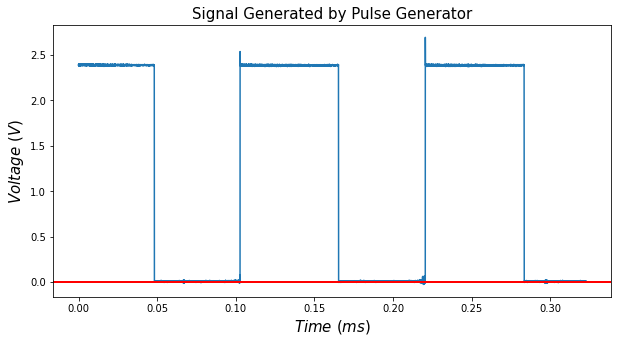

Sum of sampled values =  12884.134999999998


In [3]:
#generate file paths
pulses_files_dir = './data/pulses'

pulses_paths = ut.path_generator(pulses_files_dir)

#load a random file
v_pulses = ut.file_loader(pulses_paths)

#plot the loaded signal
ut.single_plot(v_pulses, t, 'Signal Generated by Pulse Generator')

In [4]:
#let's obtain the sums of the sampled pulses signals
sums = ut.signal_sum(pulses_paths)

print(sums)

{'./data/pulses/pulses-1.csv': 12331.040999999997, './data/pulses/pulses-10.csv': 13514.615000000002, './data/pulses/pulses-2.csv': 14129.519999999999, './data/pulses/pulses-3.csv': 14191.650999999998, './data/pulses/pulses-4.csv': 11424.214, './data/pulses/pulses-5.csv': 12884.134999999998, './data/pulses/pulses-6.csv': 12149.267, './data/pulses/pulses-7.csv': 12740.347999999998, './data/pulses/pulses-8.csv': 14193.114, './data/pulses/pulses-9.csv': 14364.149000000001}


## Pulses applied to open circuited fence
The pulses generated by the pulse generator were applied to a section of the/a fence in the/a conservancy at Dedan Kimathi University of Technology Conservancy. The section in use is approximately 110m long. The following is a visualisation of the signal at the input port of the fence.

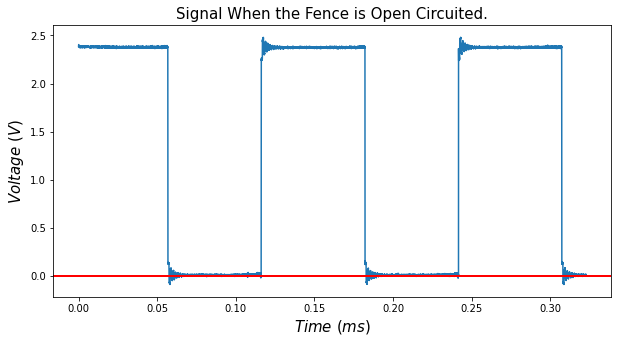

Sum of sampled values =  13934.462999999998


In [5]:
#generate file paths
open_files_dir = './data/open-circuit'

open_paths = ut.path_generator(open_files_dir)


#load a random file
v_open = ut.file_loader(open_paths)

#plot the loaded signal
ut.single_plot(v_open, t, 'Signal When the Fence is Open Circuited.')

In [6]:
np.min(v_open)

-0.085

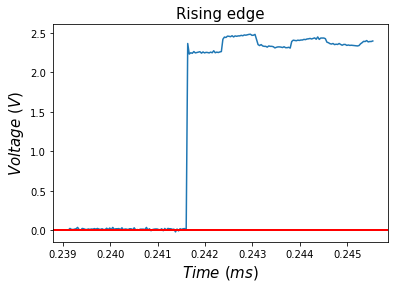

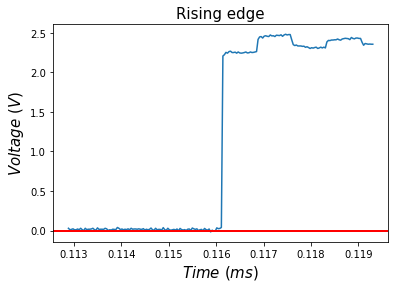

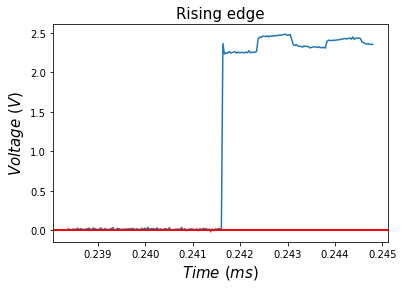

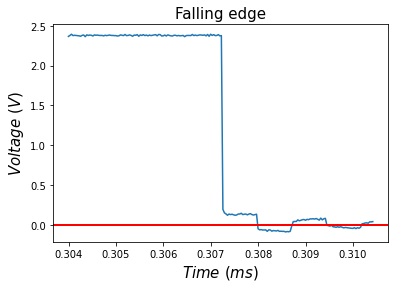

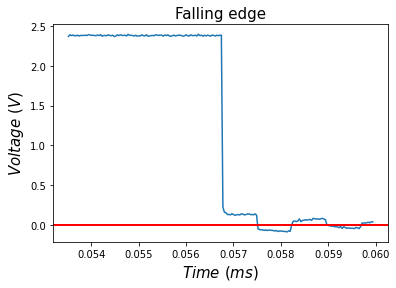

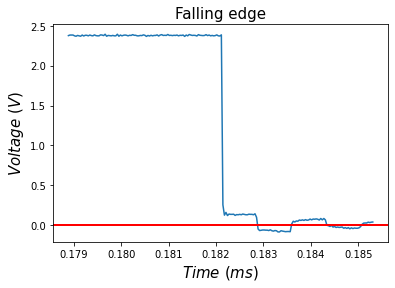

In [7]:
#locate rising and fallinge edges in the signal

open_edges_indices = ut.edges_detection(v_open, t, 3)


#plot rising an falling edges
ut.edges_plots(v_open, t, open_edges_indices, 100, 100)

In [8]:
#print sum of signals' sampled values
sums = ut.signal_sum(open_paths)

print(sums)

{'./data/open-circuit/open-110-1.csv': 11723.863, './data/open-circuit/open-110-10.csv': 12457.345, './data/open-circuit/open-110-11.csv': -8760.517000000003, './data/open-circuit/open-110-12.csv': -23779.337, './data/open-circuit/open-110-13.csv': 11847.267, './data/open-circuit/open-110-14.csv': 12863.411, './data/open-circuit/open-110-15.csv': 13341.143, './data/open-circuit/open-110-16.csv': 14239.149, './data/open-circuit/open-110-17.csv': 11314.742, './data/open-circuit/open-110-18.csv': 14598.156, './data/open-circuit/open-110-19.csv': -22999.014000000003, './data/open-circuit/open-110-2.csv': 13934.462999999998, './data/open-circuit/open-110-20.csv': -22753.984, './data/open-circuit/open-110-21.csv': 11529.428000000002, './data/open-circuit/open-110-22.csv': 13634.689000000002, './data/open-circuit/open-110-23.csv': 14227.015, './data/open-circuit/open-110-24.csv': 11247.419, './data/open-circuit/open-110-25.csv': 11760.243999999999, './data/open-circuit/open-110-26.csv': 14190

## Pulses applied to short circuited fence
The pulses generated by the pulse generator were also applied to the fence while short-circuiting it at antervals from the input point to the end. The following is a visualisation of the signals at the input port of the fence for various short circuit intervals.

### 2.6 m
Short circuit at 2.6 m from the input port

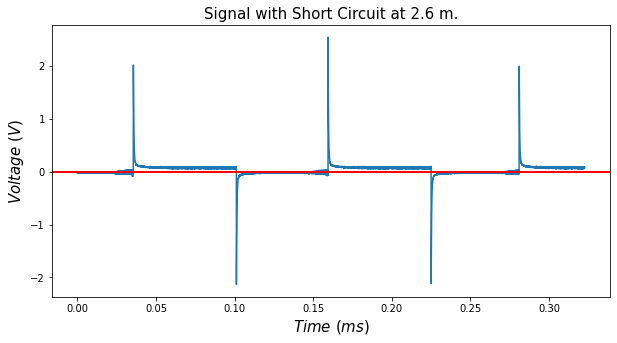

Sum of sampled values =  339.19599999999997


In [9]:
#generate file paths
short_2_6_files_dir = './data/short-circuit/2_6m'

short_2_6_paths = ut.path_generator(short_2_6_files_dir)


#load a random file
v_short_2_6 = ut.file_loader(short_2_6_paths)

#plot the loaded signal
ut.single_plot(v_short_2_6, t, 'Signal with Short Circuit at 2.6 m.')

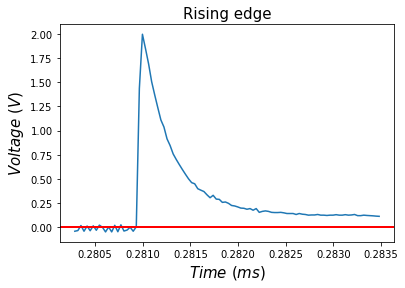

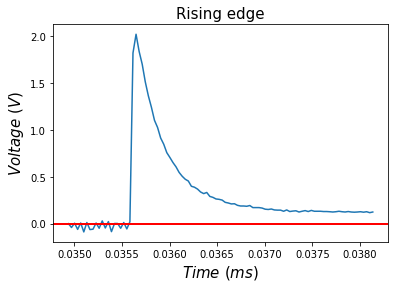

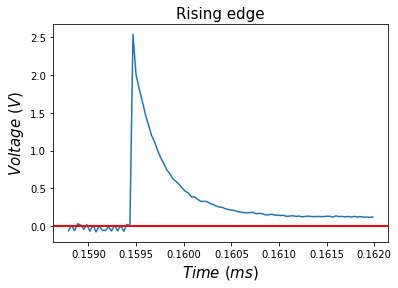

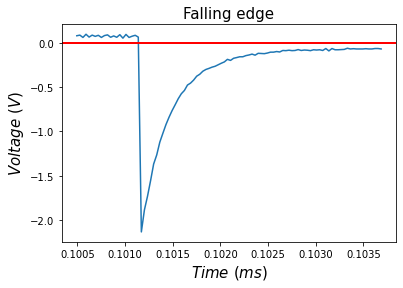

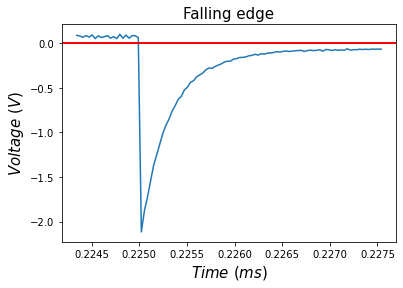

In [10]:
#locate rising and fallinge edges in the signal and plot

short_2_6_edges_indices = ut.edges_detection(v_short_2_6, t, 3)
short_2_6_edges_indices

#plot rising an falling edges
ut.edges_plots(v_short_2_6, t, short_2_6_edges_indices, 80, 20)

In [11]:
#print sum of signals' sampled values
sums = ut.signal_sum(short_2_6_paths)

print(sums)

{'./data/short-circuit/2_6m/short-110-2_6-1.csv': 237.55399999999997, './data/short-circuit/2_6m/short-110-2_6-10.csv': 234.945, './data/short-circuit/2_6m/short-110-2_6-11.csv': 327.48299999999995, './data/short-circuit/2_6m/short-110-2_6-12.csv': 339.19599999999997, './data/short-circuit/2_6m/short-110-2_6-13.csv': 224.1489999999999, './data/short-circuit/2_6m/short-110-2_6-14.csv': 370.749, './data/short-circuit/2_6m/short-110-2_6-15.csv': 362.29400000000004, './data/short-circuit/2_6m/short-110-2_6-16.csv': 233.56199999999998, './data/short-circuit/2_6m/short-110-2_6-17.csv': 339.37, './data/short-circuit/2_6m/short-110-2_6-18.csv': 228.64399999999998, './data/short-circuit/2_6m/short-110-2_6-19.csv': 259.60299999999995, './data/short-circuit/2_6m/short-110-2_6-2.csv': 425.71700000000004, './data/short-circuit/2_6m/short-110-2_6-20.csv': -22686.324000000004, './data/short-circuit/2_6m/short-110-2_6-3.csv': 282.65599999999995, './data/short-circuit/2_6m/short-110-2_6-4.csv': 258.735

### 5.4 m
Short circuit at 5.4 m from the input port

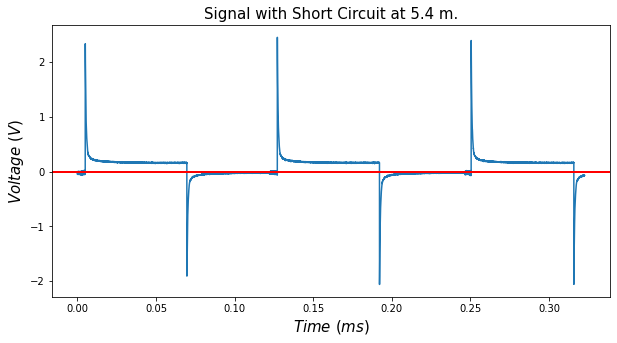

Sum of sampled values =  908.338


In [12]:
#generate file paths
short_5_4_files_dir = './data/short-circuit/5_4m'
short_5_4_paths = ut.path_generator(short_5_4_files_dir)

#load a random file
v_short_5_4 = ut.file_loader(short_5_4_paths)


#plot the loaded signal
ut.single_plot(v_short_5_4, t, 'Signal with Short Circuit at 5.4 m.')

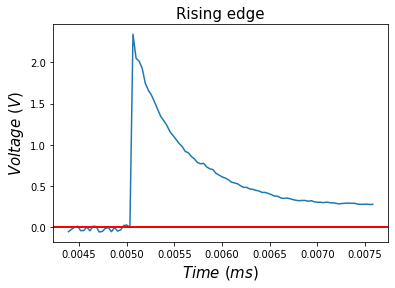

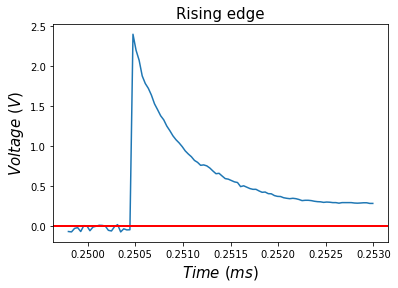

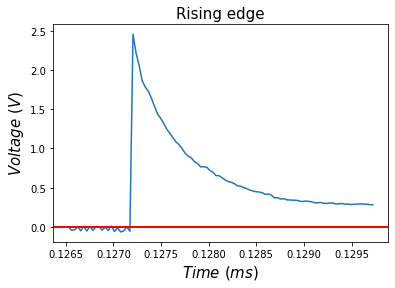

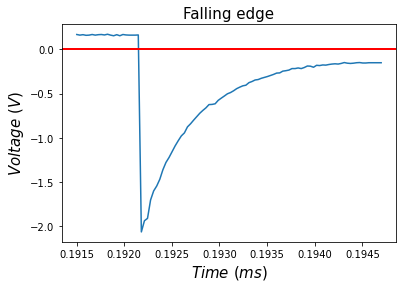

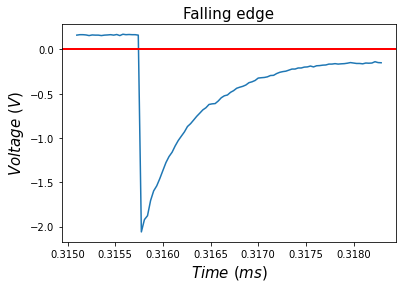

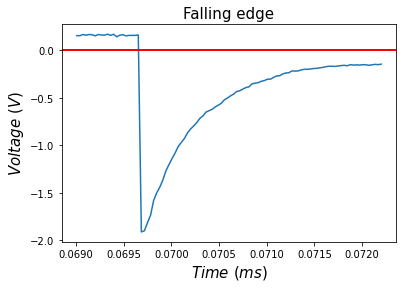

In [13]:
#locate rising and fallinge edges in the signal

short_5_4_edges_indices = ut.edges_detection(v_short_5_4, t, 3)


#plot rising an falling edges
ut.edges_plots(v_short_5_4, t, short_5_4_edges_indices, 80, 20)

In [14]:
#print sum of signals' sampled values
sums = ut.signal_sum(short_5_4_paths)

print(sums)

{'./data/short-circuit/5_4m/short-110-5_4-1.csv': 866.513, './data/short-circuit/5_4m/short-110-5_4-10.csv': 908.338, './data/short-circuit/5_4m/short-110-5_4-11.csv': 924.5359999999998, './data/short-circuit/5_4m/short-110-5_4-12.csv': 1413.2540000000001, './data/short-circuit/5_4m/short-110-5_4-13.csv': 1218.8700000000001, './data/short-circuit/5_4m/short-110-5_4-14.csv': 1355.0620000000001, './data/short-circuit/5_4m/short-110-5_4-15.csv': 1212.9400000000003, './data/short-circuit/5_4m/short-110-5_4-16.csv': 1151.6840000000002, './data/short-circuit/5_4m/short-110-5_4-17.csv': 1469.246, './data/short-circuit/5_4m/short-110-5_4-18.csv': 630.6449999999998, './data/short-circuit/5_4m/short-110-5_4-19.csv': 1172.333, './data/short-circuit/5_4m/short-110-5_4-2.csv': 672.797, './data/short-circuit/5_4m/short-110-5_4-20.csv': 997.4170000000001, './data/short-circuit/5_4m/short-110-5_4-3.csv': 544.558, './data/short-circuit/5_4m/short-110-5_4-4.csv': 897.4560000000001, './data/short-circuit

### 8.6 m
Short circuit at 8.6 m from the input port

Invalid file. Searching for another file


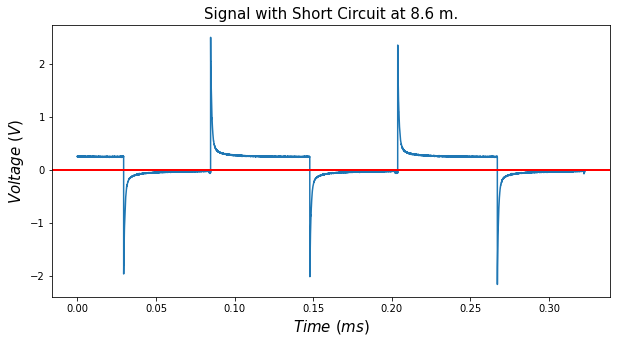

Sum of sampled values =  999.409


In [15]:
#generate file paths
short_8_6_files_dir = './data/short-circuit/8_6m'
short_8_6_paths = ut.path_generator(short_8_6_files_dir)

#load a random file
v_short_8_6 = ut.file_loader(short_8_6_paths)


#plot the loaded signal
ut.single_plot(v_short_8_6, t, 'Signal with Short Circuit at 8.6 m.')

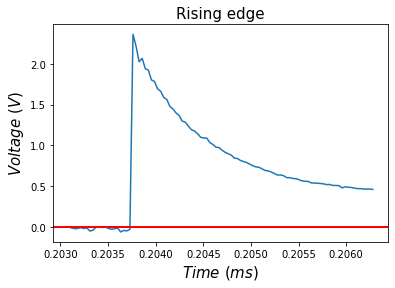

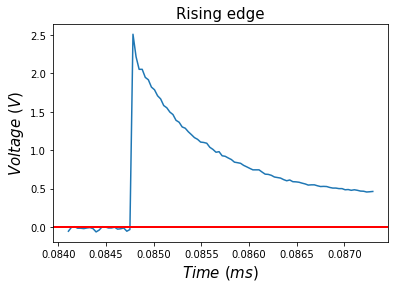

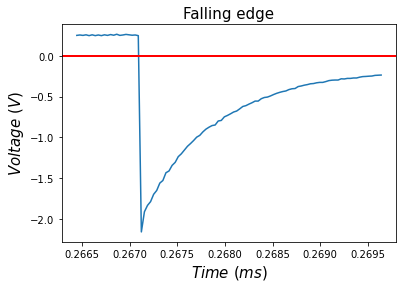

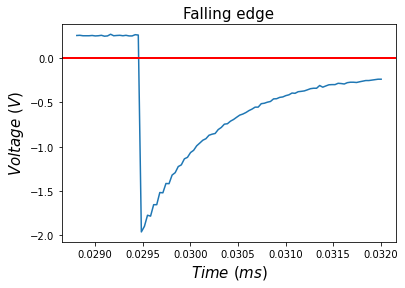

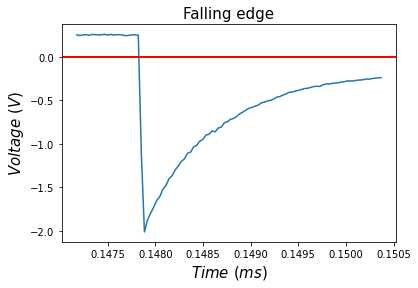

In [16]:
#locate rising and fallinge edges in the signal

short_8_6_edges_indices = ut.edges_detection(v_short_8_6, t, 3)
short_8_6_edges_indices


#plot rising an falling edges
ut.edges_plots(v_short_8_6, t, short_8_6_edges_indices, 80, 20)

In [17]:
#print sum of signals' sampled values
sums = ut.signal_sum(short_8_6_paths)

print(sums)

{'./data/short-circuit/8_6m/short-110-8_6-1.csv': 1278.145, './data/short-circuit/8_6m/short-110-8_6-10.csv': 1532.288, './data/short-circuit/8_6m/short-110-8_6-11.csv': 1555.046, './data/short-circuit/8_6m/short-110-8_6-12.csv': 1460.163, './data/short-circuit/8_6m/short-110-8_6-13.csv': 1590.532, './data/short-circuit/8_6m/short-110-8_6-14.csv': 1420.6529999999998, './data/short-circuit/8_6m/short-110-8_6-15.csv': 1075.8799999999999, './data/short-circuit/8_6m/short-110-8_6-16.csv': 1438.579, './data/short-circuit/8_6m/short-110-8_6-17.csv': 1478.966, './data/short-circuit/8_6m/short-110-8_6-18.csv': 1554.6109999999999, './data/short-circuit/8_6m/short-110-8_6-19.csv': -24880.181000000004, './data/short-circuit/8_6m/short-110-8_6-2.csv': 1480.729, './data/short-circuit/8_6m/short-110-8_6-20.csv': 1319.7669999999998, './data/short-circuit/8_6m/short-110-8_6-3.csv': 1018.49, './data/short-circuit/8_6m/short-110-8_6-4.csv': 1393.537, './data/short-circuit/8_6m/short-110-8_6-5.csv': 958.

### 12 m
Short circuit at 12 m from the input port

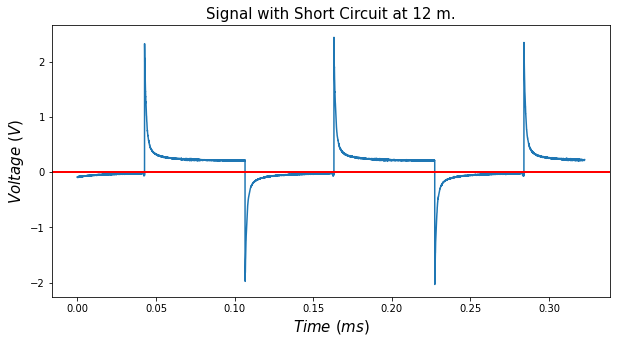

Sum of sampled values =  1067.9170000000001


In [18]:
#generate file paths
short_12_files_dir = './data/short-circuit/12m'
short_12_paths = ut.path_generator(short_12_files_dir)

#load a random file
v_short_12 = ut.file_loader(short_12_paths)


#plot the loaded signal
ut.single_plot(v_short_12, t, 'Signal with Short Circuit at 12 m.')

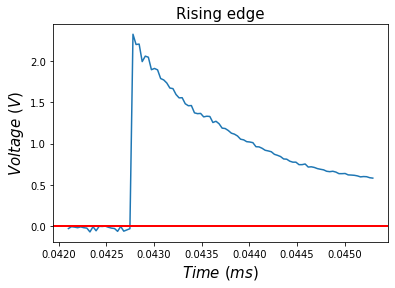

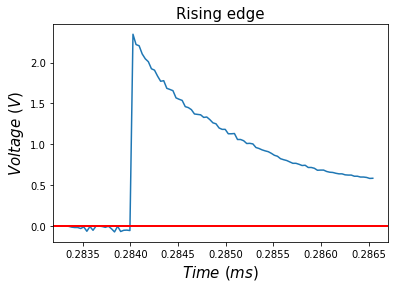

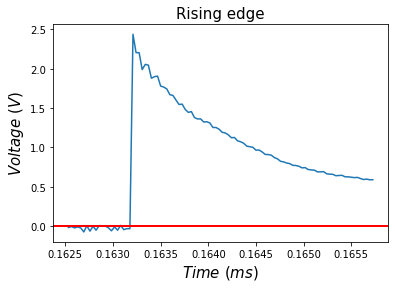

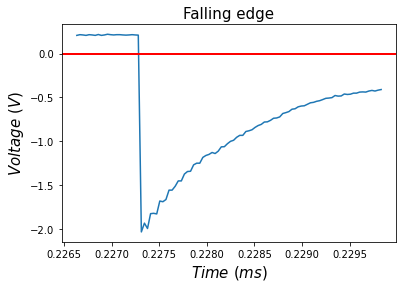

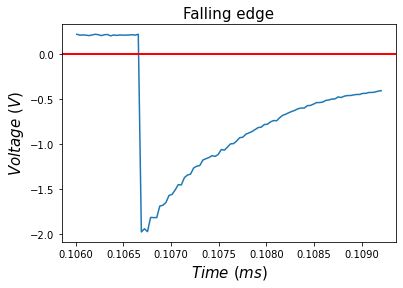

In [19]:
#locate rising and fallinge edges in the signal

short_12_edges_indices = ut.edges_detection(v_short_12, t, 3)
short_12_edges_indices


#plot rising an falling edges
ut.edges_plots(v_short_12, t, short_12_edges_indices, 80, 20)


In [20]:
#print sum of signals' sampled values
sums = ut.signal_sum(short_12_paths)

print(sums)

{'./data/short-circuit/12m/short-110-12-1.csv': 1531.272, './data/short-circuit/12m/short-110-12-10.csv': 1240.374, './data/short-circuit/12m/short-110-12-11.csv': 1065.835, './data/short-circuit/12m/short-110-12-12.csv': 1067.9170000000001, './data/short-circuit/12m/short-110-12-13.csv': 1187.942, './data/short-circuit/12m/short-110-12-14.csv': 1141.9740000000002, './data/short-circuit/12m/short-110-12-15.csv': 960.0029999999999, './data/short-circuit/12m/short-110-12-16.csv': 800.6700000000001, './data/short-circuit/12m/short-110-12-17.csv': 1201.0800000000002, './data/short-circuit/12m/short-110-12-18.csv': 794.5210000000002, './data/short-circuit/12m/short-110-12-19.csv': 1078.24, './data/short-circuit/12m/short-110-12-2.csv': 695.9739999999999, './data/short-circuit/12m/short-110-12-20.csv': 771.105, './data/short-circuit/12m/short-110-12-21.csv': 1226.79, './data/short-circuit/12m/short-110-12-3.csv': 1070.8200000000002, './data/short-circuit/12m/short-110-12-4.csv': 824.441, './

### 17 m
Short circuit at 17 m from the input port

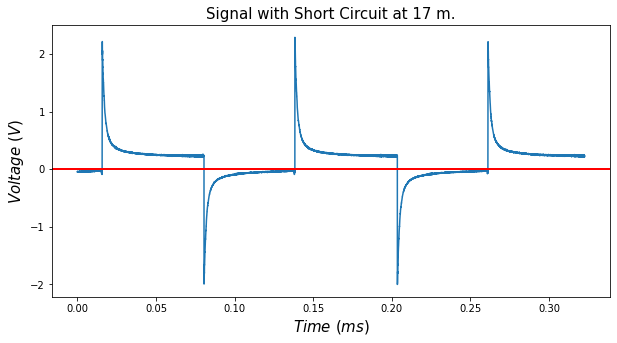

Sum of sampled values =  1426.07


In [21]:
#generate file paths
short_17_files_dir = './data/short-circuit/17m'
short_17_paths = ut.path_generator(short_17_files_dir)

#load a random file
v_short_17 = ut.file_loader(short_17_paths)


#plot the loaded signal
ut.single_plot(v_short_17, t, 'Signal with Short Circuit at 17 m.')

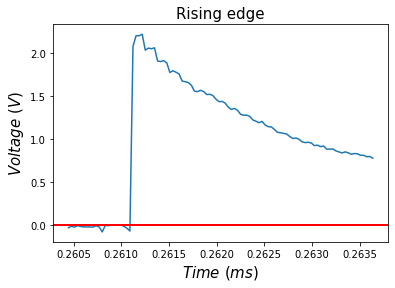

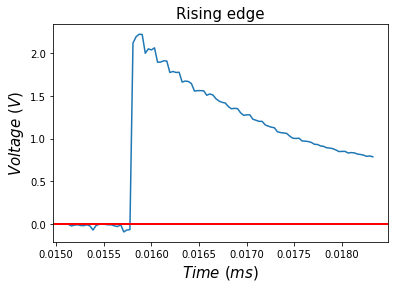

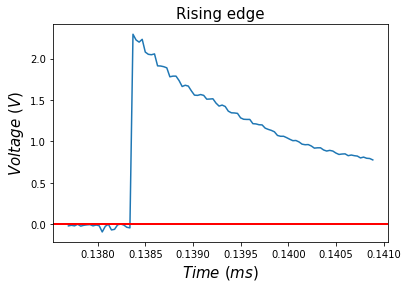

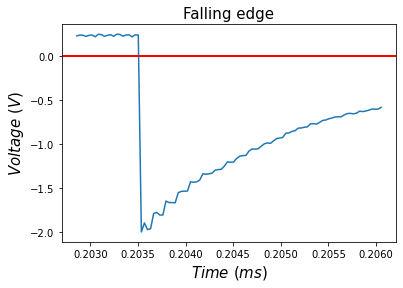

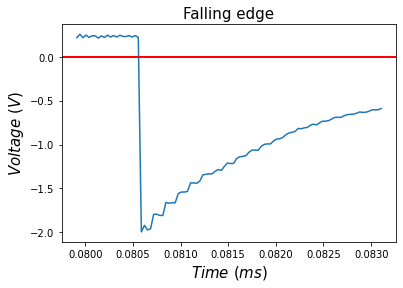

In [22]:
#locate rising and fallinge edges in the signal

short_17_edges_indices = ut.edges_detection(v_short_17, t, 3)
short_17_edges_indices


#plot rising an falling edges
ut.edges_plots(v_short_17, t, short_17_edges_indices, 80, 20)

In [23]:
#print sum of signals' sampled values
sums = ut.signal_sum(short_17_paths)

print(sums)

{'./data/short-circuit/17m/short-110-17-1.csv': 1276.701, './data/short-circuit/17m/short-110-17-10.csv': 1316.189, './data/short-circuit/17m/short-110-17-11.csv': 868.7710000000002, './data/short-circuit/17m/short-110-17-12.csv': 1376.9589999999998, './data/short-circuit/17m/short-110-17-13.csv': 1252.597, './data/short-circuit/17m/short-110-17-14.csv': 891.271, './data/short-circuit/17m/short-110-17-15.csv': 1363.075, './data/short-circuit/17m/short-110-17-16.csv': 1200.155, './data/short-circuit/17m/short-110-17-17.csv': 1426.07, './data/short-circuit/17m/short-110-17-18.csv': 1475.818, './data/short-circuit/17m/short-110-17-19.csv': 1162.342, './data/short-circuit/17m/short-110-17-2.csv': 1336.219, './data/short-circuit/17m/short-110-17-20.csv': 770.714, './data/short-circuit/17m/short-110-17-21.csv': 1053.304, './data/short-circuit/17m/short-110-17-3.csv': 841.5020000000001, './data/short-circuit/17m/short-110-17-4.csv': 990.028, './data/short-circuit/17m/short-110-17-5.csv': 856.

### 22 m
Short circuit at 22 m from the input port

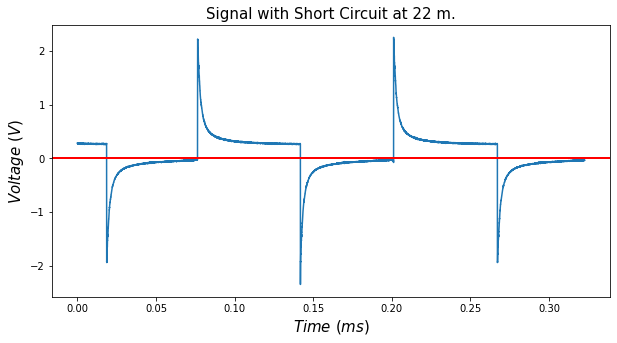

Sum of sampled values =  803.4470000000003


In [24]:
#generate file paths
short_22_files_dir = './data/short-circuit/22m'
short_22_paths = ut.path_generator(short_22_files_dir)

#load a random file
v_short_22 = ut.file_loader(short_22_paths)


#plot the loaded signal
ut.single_plot(v_short_22, t, 'Signal with Short Circuit at 22 m.')


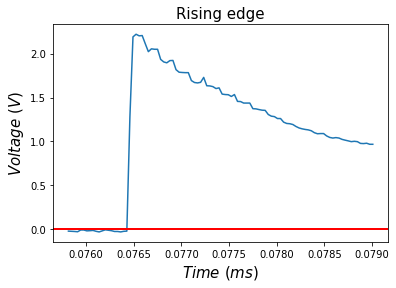

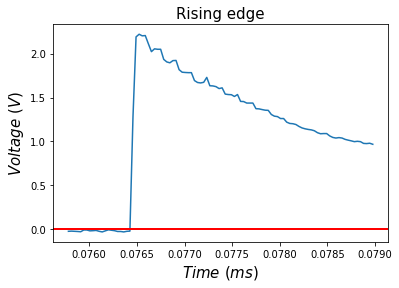

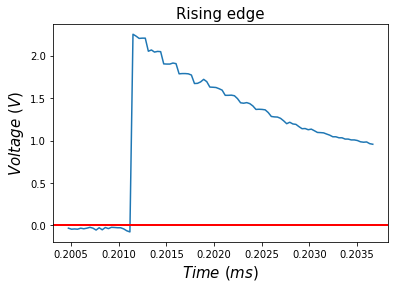

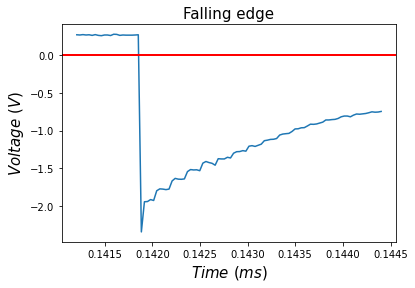

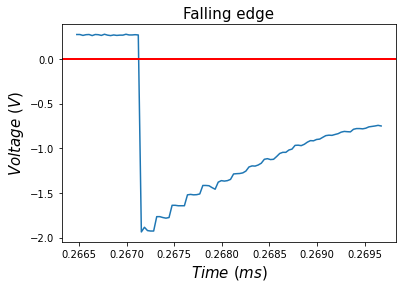

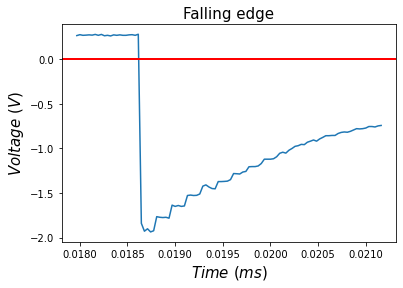

In [25]:
#locate rising and fallinge edges in the signal

short_22_edges_indices = ut.edges_detection(v_short_22, t, 3)
short_22_edges_indices


#plot rising an falling edges
ut.edges_plots(v_short_22, t, short_22_edges_indices, 80, 20)

In [26]:
#print sum of signals' sampled values
sums = ut.signal_sum(short_22_paths)

print(sums)

{'./data/short-circuit/22m/short-110-22-1.csv': 1063.963, './data/short-circuit/22m/short-110-22-10.csv': 1039.297, './data/short-circuit/22m/short-110-22-11.csv': 1175.377, './data/short-circuit/22m/short-110-22-12.csv': 1352.907, './data/short-circuit/22m/short-110-22-13.csv': 770.1670000000001, './data/short-circuit/22m/short-110-22-14.csv': 1033.409, './data/short-circuit/22m/short-110-22-15.csv': 1201.012, './data/short-circuit/22m/short-110-22-16.csv': 1158.645, './data/short-circuit/22m/short-110-22-17.csv': 1202.532, './data/short-circuit/22m/short-110-22-18.csv': 775.588, './data/short-circuit/22m/short-110-22-19.csv': 1648.516, './data/short-circuit/22m/short-110-22-2.csv': 1599.0079999999998, './data/short-circuit/22m/short-110-22-20.csv': 803.4470000000003, './data/short-circuit/22m/short-110-22-21.csv': 1379.8899999999999, './data/short-circuit/22m/short-110-22-3.csv': 1378.7649999999999, './data/short-circuit/22m/short-110-22-4.csv': 971.909, './data/short-circuit/22m/sho

### 27 m
Short circuit at 27 m from the input port

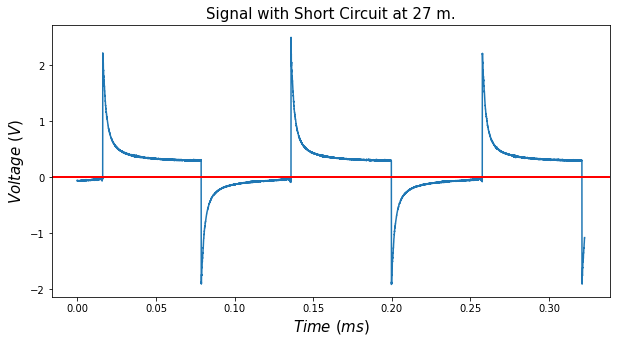

Sum of sampled values =  1772.0380000000002


In [27]:

#generate file paths
short_27_files_dir = './data/short-circuit/27m'
short_27_paths = ut.path_generator(short_27_files_dir)

#load a random file
v_short_27 = ut.file_loader(short_27_paths)


#plot the loaded signal
ut.single_plot(v_short_27, t, 'Signal with Short Circuit at 27 m.')

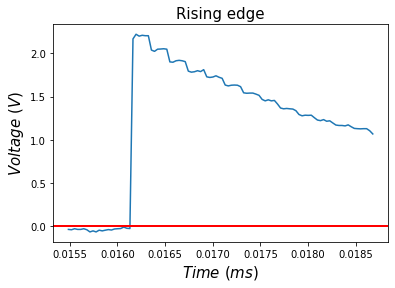

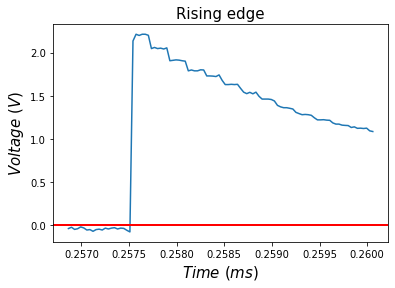

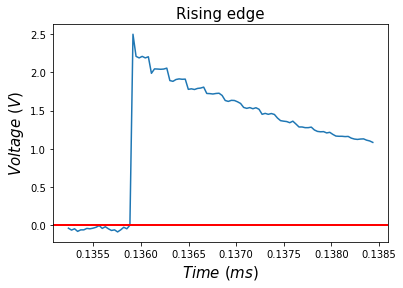

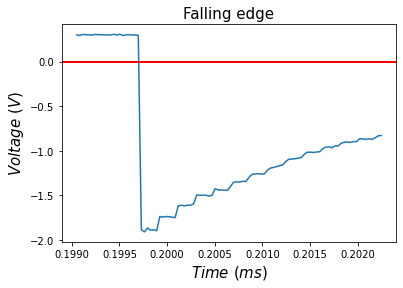

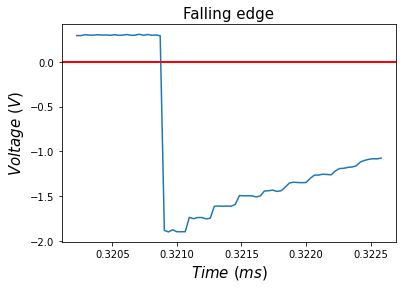

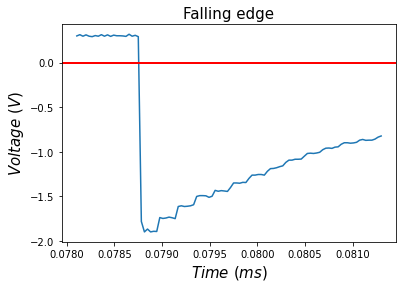

In [28]:
#locate rising and fallinge edges in the signal

short_27_edges_indices = ut.edges_detection(v_short_27, t, 3)
short_27_edges_indices


#plot rising an falling edges
ut.edges_plots(v_short_27, t, short_27_edges_indices, 80, 20)

In [29]:
#print sum of signals' sampled values
sums = ut.signal_sum(short_27_paths)

print(sums)

{'./data/short-circuit/27m/short-110-27-1.csv': 1473.9180000000001, './data/short-circuit/27m/short-110-27-10.csv': 1114.603, './data/short-circuit/27m/short-110-27-11.csv': 1629.308, './data/short-circuit/27m/short-110-27-12.csv': 1201.4920000000002, './data/short-circuit/27m/short-110-27-13.csv': 1793.299, './data/short-circuit/27m/short-110-27-14.csv': 1772.0380000000002, './data/short-circuit/27m/short-110-27-15.csv': 1164.855, './data/short-circuit/27m/short-110-27-16.csv': 1594.9740000000002, './data/short-circuit/27m/short-110-27-17.csv': 946.3809999999999, './data/short-circuit/27m/short-110-27-18.csv': 1138.188, './data/short-circuit/27m/short-110-27-19.csv': 1320.3280000000002, './data/short-circuit/27m/short-110-27-2.csv': 1010.6349999999998, './data/short-circuit/27m/short-110-27-20.csv': 1467.906, './data/short-circuit/27m/short-110-27-21.csv': 1286.223, './data/short-circuit/27m/short-110-27-3.csv': 1111.625, './data/short-circuit/27m/short-110-27-4.csv': 1317.109, './dat

### 32 m
Short circuit at 32 m from the input port

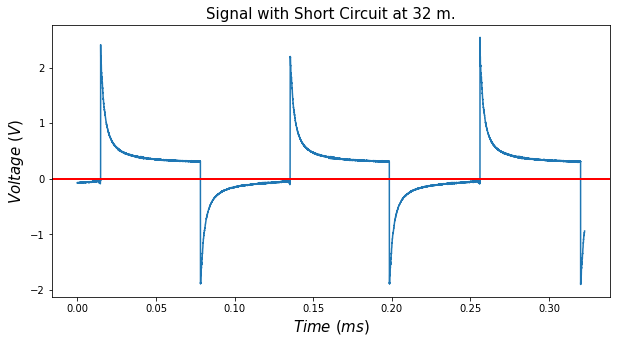

Sum of sampled values =  1828.462


In [30]:
#generate file paths
short_32_files_dir = './data/short-circuit/32m'
short_32_paths = ut.path_generator(short_32_files_dir)

#load a random file
v_short_32 = ut.file_loader(short_32_paths)


#plot the loaded signal
ut.single_plot(v_short_32, t, 'Signal with Short Circuit at 32 m.')

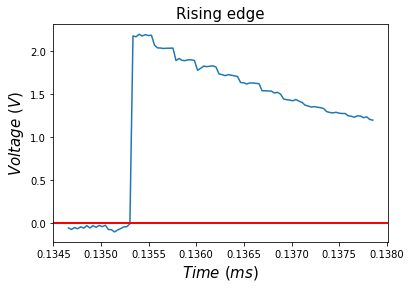

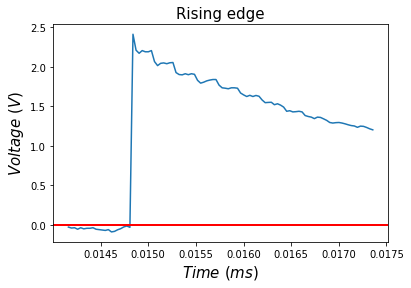

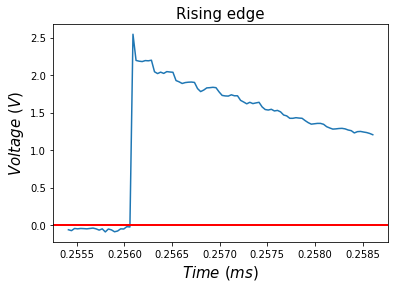

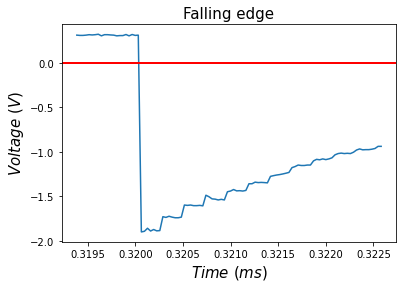

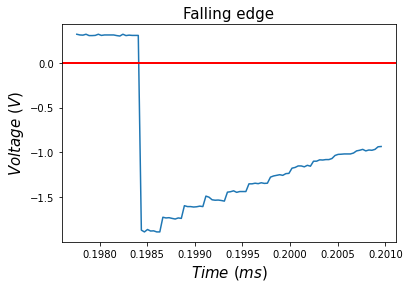

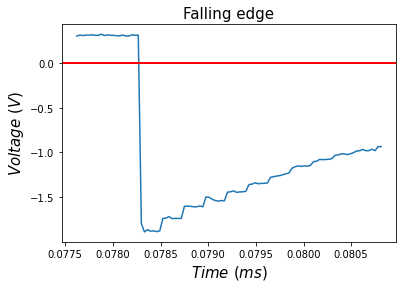

In [31]:
#locate rising and fallinge edges in the signal

short_32_edges_indices = ut.edges_detection(v_short_32, t, 3)
short_32_edges_indices


#plot rising an falling edges
ut.edges_plots(v_short_32, t, short_32_edges_indices, 80, 20)

In [32]:
#print sum of signals' sampled values
sums = ut.signal_sum(short_32_paths)

print(sums)

{'./data/short-circuit/32m/short-110-32-1.csv': 1932.594, './data/short-circuit/32m/short-110-32-10.csv': 965.046, './data/short-circuit/32m/short-110-32-11.csv': 1745.512, './data/short-circuit/32m/short-110-32-12.csv': 1377.62, './data/short-circuit/32m/short-110-32-13.csv': 1217.9079999999997, './data/short-circuit/32m/short-110-32-14.csv': 1131.461, './data/short-circuit/32m/short-110-32-15.csv': 1768.5620000000001, './data/short-circuit/32m/short-110-32-16.csv': 1128.551, './data/short-circuit/32m/short-110-32-17.csv': 1689.7839999999997, './data/short-circuit/32m/short-110-32-18.csv': 1779.355, './data/short-circuit/32m/short-110-32-19.csv': 1841.7830000000001, './data/short-circuit/32m/short-110-32-2.csv': 1010.8889999999999, './data/short-circuit/32m/short-110-32-20.csv': 974.479, './data/short-circuit/32m/short-110-32-21.csv': 917.5060000000001, './data/short-circuit/32m/short-110-32-3.csv': 1385.31, './data/short-circuit/32m/short-110-32-4.csv': 1910.1549999999997, './data/sh

### 37 m
Short circuit at 37 m from the input port

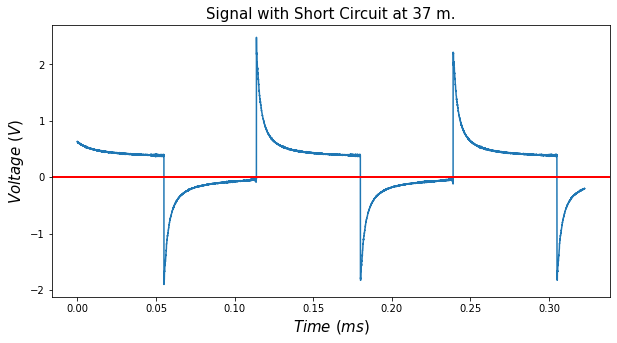

Sum of sampled values =  1843.7720000000002


In [33]:
#generate file paths
short_37_files_dir = './data/short-circuit/37m'
short_37_paths = ut.path_generator(short_37_files_dir)

#load a random file
v_short_37 = ut.file_loader(short_37_paths)


#plot the loaded signal
ut.single_plot(v_short_37, t, 'Signal with Short Circuit at 37 m.')

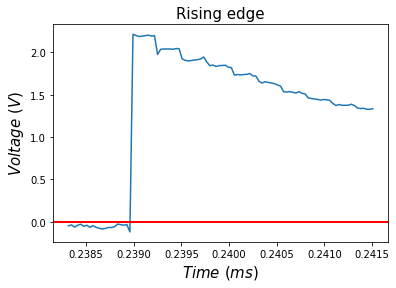

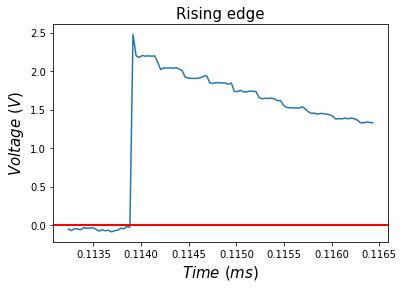

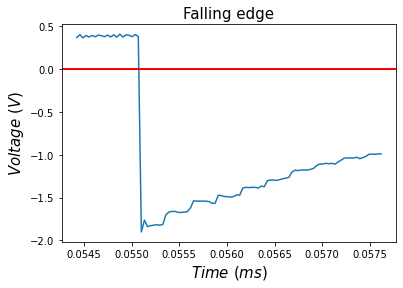

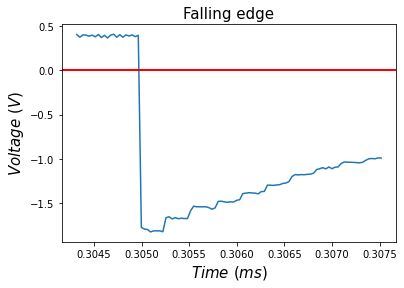

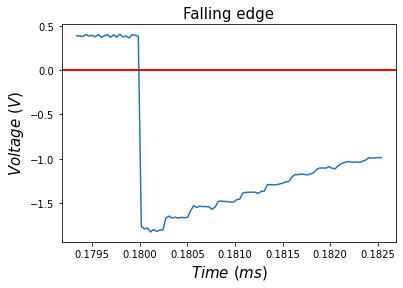

In [34]:
#locate rising and fallinge edges in the signal

short_37_edges_indices = ut.edges_detection(v_short_37, t, 3)
short_37_edges_indices


#plot rising an falling edges
ut.edges_plots(v_short_37, t, short_37_edges_indices, 80, 20)

In [35]:
#print sum of signals' sampled values
sums = ut.signal_sum(short_37_paths)

print(sums)

{'./data/short-circuit/37m/short-110-37-1.csv': 2325.6169999999997, './data/short-circuit/37m/short-110-37-10.csv': 1123.6059999999998, './data/short-circuit/37m/short-110-37-11.csv': 1632.718, './data/short-circuit/37m/short-110-37-12.csv': 2293.9179999999997, './data/short-circuit/37m/short-110-37-13.csv': 1334.1869999999997, './data/short-circuit/37m/short-110-37-14.csv': 1551.9710000000002, './data/short-circuit/37m/short-110-37-15.csv': 1640.616, './data/short-circuit/37m/short-110-37-16.csv': 1519.622, './data/short-circuit/37m/short-110-37-17.csv': 2675.5699999999997, './data/short-circuit/37m/short-110-37-18.csv': 2641.448, './data/short-circuit/37m/short-110-37-19.csv': 2243.9970000000003, './data/short-circuit/37m/short-110-37-2.csv': 1306.6259999999997, './data/short-circuit/37m/short-110-37-20.csv': 1492.935, './data/short-circuit/37m/short-110-37-3.csv': 1738.134, './data/short-circuit/37m/short-110-37-4.csv': 1409.675, './data/short-circuit/37m/short-110-37-5.csv': 2323.4

### 42 m
Short circuit at 42 m from the input port

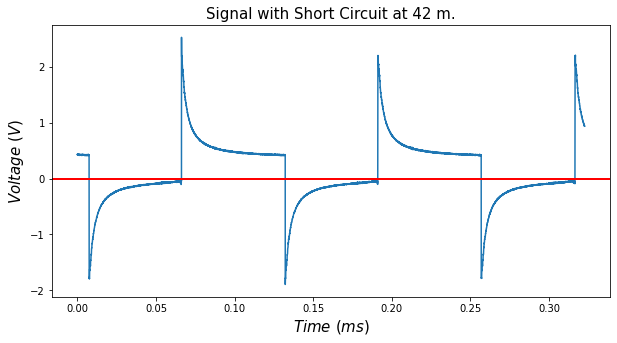

Sum of sampled values =  1389.5569999999998


In [36]:
#generate file paths
short_42_files_dir = './data/short-circuit/42m'
short_42_paths = ut.path_generator(short_42_files_dir)

#load a random file
v_short_42 = ut.file_loader(short_42_paths)

#plot the loaded signal
ut.single_plot(v_short_42, t, 'Signal with Short Circuit at 42 m.')

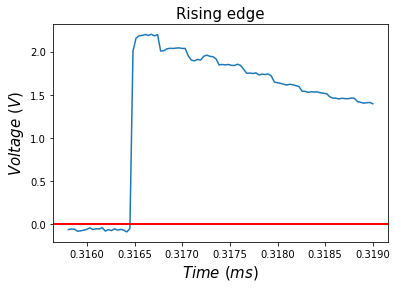

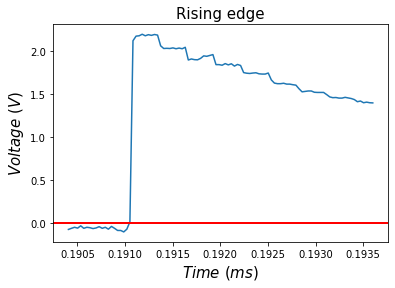

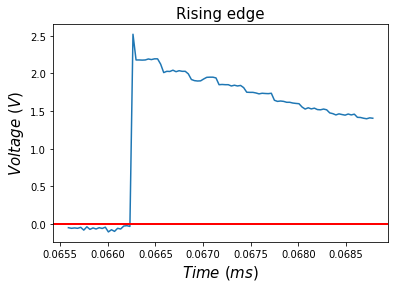

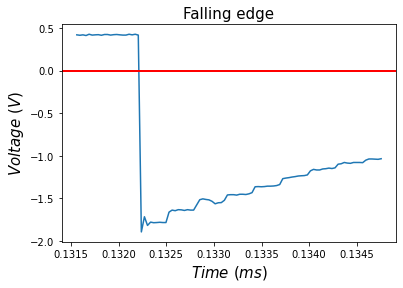

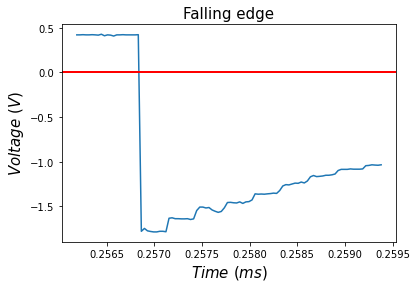

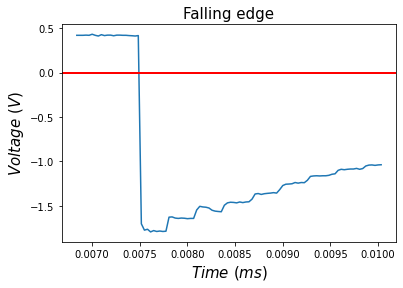

In [37]:
#locate rising and fallinge edges in the signal

short_42_edges_indices = ut.edges_detection(v_short_42, t, 3)
short_42_edges_indices


#plot rising an falling edges
ut.edges_plots(v_short_42, t, short_42_edges_indices, 80, 20)

In [38]:
#print sum of signals' sampled values
sums = ut.signal_sum(short_42_paths)

print(sums)

{'./data/short-circuit/42m/short-110-42-1.csv': 2182.627, './data/short-circuit/42m/short-110-42-10.csv': 2021.008, './data/short-circuit/42m/short-110-42-11.csv': 1550.1940000000002, './data/short-circuit/42m/short-110-42-12.csv': -25255.941000000006, './data/short-circuit/42m/short-110-42-13.csv': 1863.7330000000002, './data/short-circuit/42m/short-110-42-14.csv': 1441.1770000000001, './data/short-circuit/42m/short-110-42-15.csv': 1502.39, './data/short-circuit/42m/short-110-42-16.csv': 1209.875, './data/short-circuit/42m/short-110-42-17.csv': 1855.1599999999999, './data/short-circuit/42m/short-110-42-18.csv': 1434.913, './data/short-circuit/42m/short-110-42-19.csv': 1543.144, './data/short-circuit/42m/short-110-42-2.csv': 1389.5569999999998, './data/short-circuit/42m/short-110-42-20.csv': 1924.5539999999999, './data/short-circuit/42m/short-110-42-21.csv': 2330.949, './data/short-circuit/42m/short-110-42-3.csv': 2230.7259999999997, './data/short-circuit/42m/short-110-42-4.csv': -2548

### 47 m
Short circuit at 47 m from the input port

Invalid file. Searching for another file


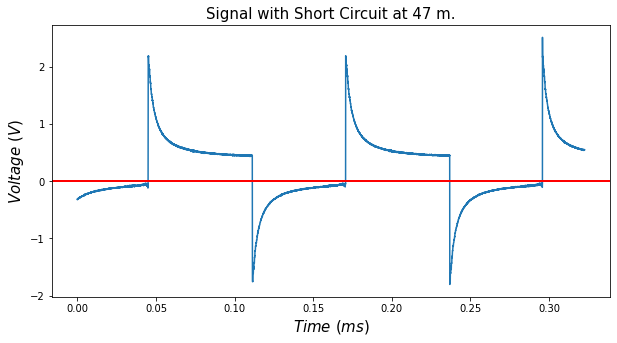

Sum of sampled values =  2139.156


In [39]:
#generate file paths
short_47_files_dir = './data/short-circuit/47m'
short_47_paths = ut.path_generator(short_47_files_dir)

#load a random file
v_short_47 = ut.file_loader(short_47_paths)


#plot the loaded signal
ut.single_plot(v_short_47, t, 'Signal with Short Circuit at 47 m.')

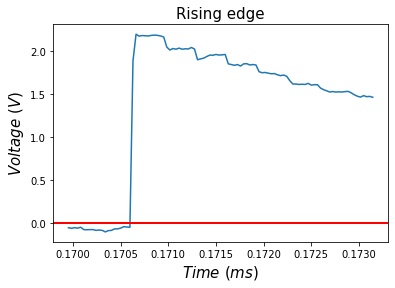

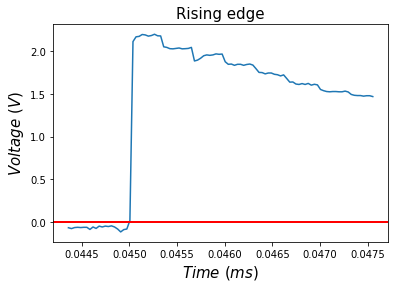

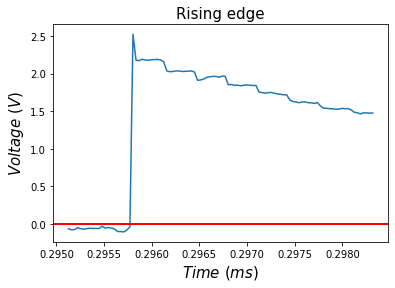

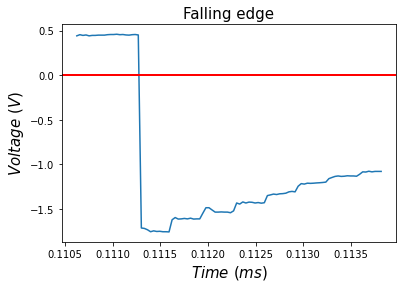

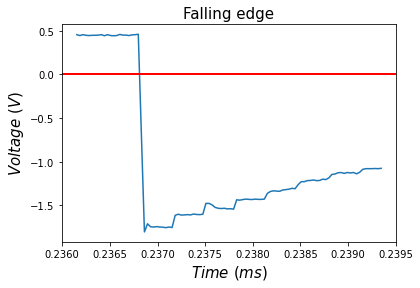

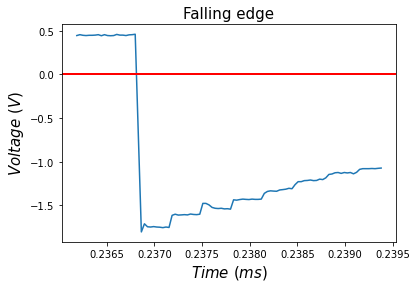

In [40]:
#locate rising and fallinge edges in the signal

short_47_edges_indices = ut.edges_detection(v_short_47, t, 3)
short_47_edges_indices


#plot rising an falling edges
ut.edges_plots(v_short_47, t, short_47_edges_indices, 80, 20)

In [41]:
#print sum of signals' sampled values
sums = ut.signal_sum(short_47_paths)

print(sums)

{'./data/short-circuit/47m/short-110-47-1.csv': 2777.962, './data/short-circuit/47m/short-110-47-10.csv': 2616.036, './data/short-circuit/47m/short-110-47-11.csv': 2610.258, './data/short-circuit/47m/short-110-47-12.csv': 2818.0370000000003, './data/short-circuit/47m/short-110-47-13.csv': -25214.575, './data/short-circuit/47m/short-110-47-14.csv': 2101.86, './data/short-circuit/47m/short-110-47-15.csv': 2134.6899999999996, './data/short-circuit/47m/short-110-47-16.csv': 2366.6810000000005, './data/short-circuit/47m/short-110-47-17.csv': 2179.263, './data/short-circuit/47m/short-110-47-18.csv': 2338.857, './data/short-circuit/47m/short-110-47-19.csv': -24938.941000000003, './data/short-circuit/47m/short-110-47-2.csv': 1659.6179999999997, './data/short-circuit/47m/short-110-47-20.csv': 2653.69, './data/short-circuit/47m/short-110-47-21.csv': 1490.0520000000001, './data/short-circuit/47m/short-110-47-22.csv': 1899.196, './data/short-circuit/47m/short-110-47-23.csv': 2631.266, './data/shor

### 52 m
Short circuit at 52 m from the input port

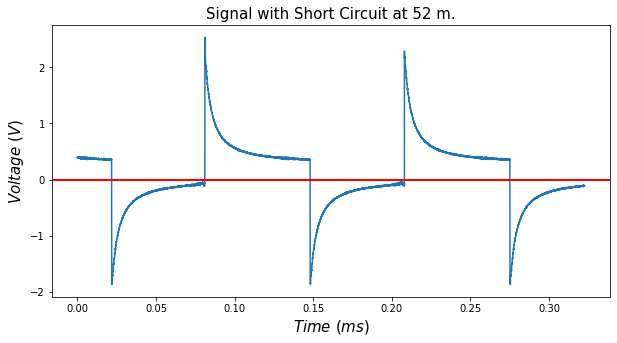

Sum of sampled values =  893.0129999999999


In [42]:
#generate file paths
short_52_files_dir = './data/short-circuit/52m'
short_52_paths = ut.path_generator(short_52_files_dir)

#load a random file
v_short_52 = ut.file_loader(short_52_paths)


#plot the loaded signal
ut.single_plot(v_short_52, t, 'Signal with Short Circuit at 52 m.')

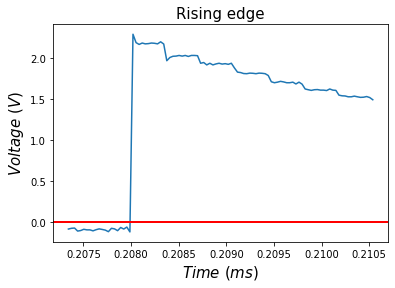

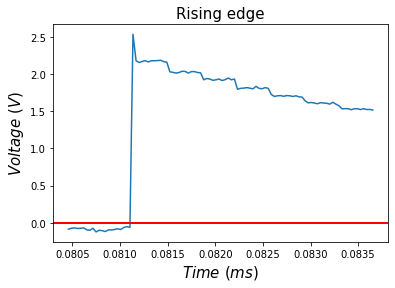

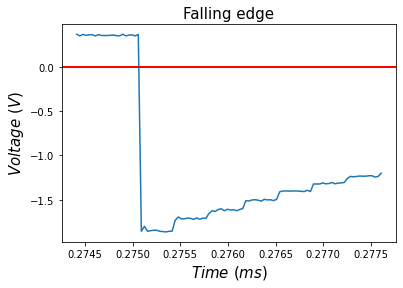

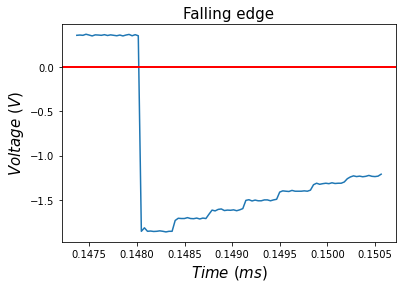

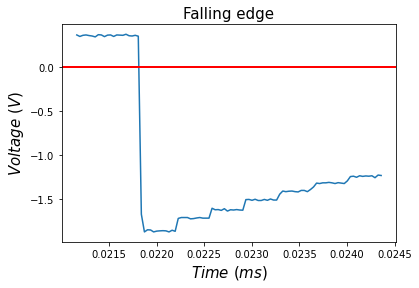

In [43]:
#locate rising and fallinge edges in the signal

short_52_edges_indices = ut.edges_detection(v_short_52, t, 3)
short_52_edges_indices


#plot rising an falling edges
ut.edges_plots(v_short_52, t, short_52_edges_indices, 80, 20)

In [44]:
#print sum of signals' sampled values
sums = ut.signal_sum(short_52_paths)

print(sums)

{'./data/short-circuit/52m/short-110-52-1.csv': 1225.513, './data/short-circuit/52m/short-110-52-10.csv': 877.3640000000001, './data/short-circuit/52m/short-110-52-11.csv': 2054.419, './data/short-circuit/52m/short-110-52-12.csv': -10920.776, './data/short-circuit/52m/short-110-52-13.csv': 1205.654, './data/short-circuit/52m/short-110-52-14.csv': 859.43, './data/short-circuit/52m/short-110-52-15.csv': -25254.333, './data/short-circuit/52m/short-110-52-16.csv': 1025.2479999999998, './data/short-circuit/52m/short-110-52-17.csv': 1939.609, './data/short-circuit/52m/short-110-52-18.csv': 736.4560000000001, './data/short-circuit/52m/short-110-52-19.csv': 1942.788, './data/short-circuit/52m/short-110-52-2.csv': 902.7419999999997, './data/short-circuit/52m/short-110-52-20.csv': 1603.7359999999999, './data/short-circuit/52m/short-110-52-21.csv': 1362.616, './data/short-circuit/52m/short-110-52-3.csv': 1618.215, './data/short-circuit/52m/short-110-52-4.csv': 1525.5430000000001, './data/short-ci

### 57 m
Short circuit at 57 m from the input port

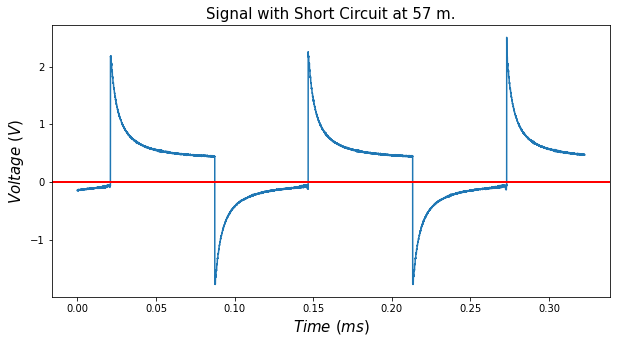

Sum of sampled values =  2593.113


In [45]:
#generate file paths
short_57_files_dir = './data/short-circuit/57m'
short_57_paths = ut.path_generator(short_57_files_dir)

#load a random file
v_short_57 = ut.file_loader(short_57_paths)

#plot the loaded signal
ut.single_plot(v_short_57, t, 'Signal with Short Circuit at 57 m.')

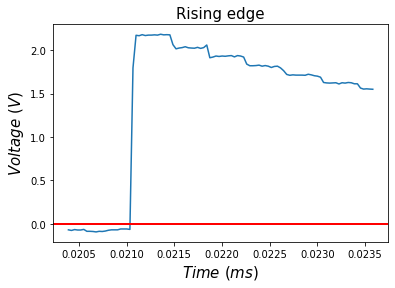

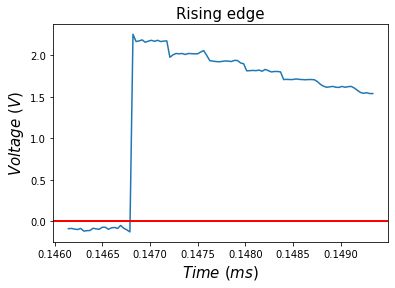

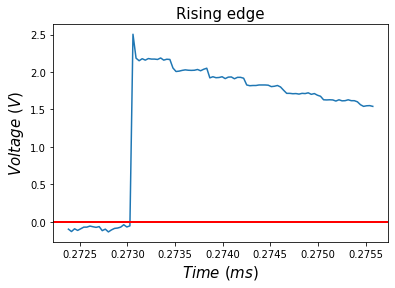

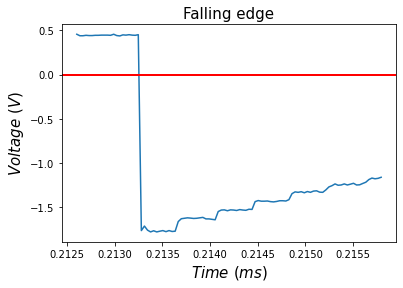

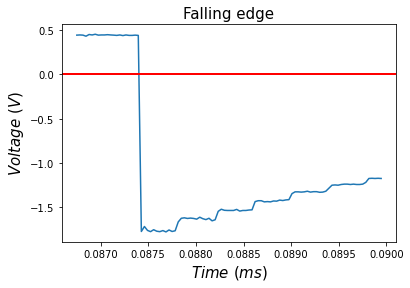

In [46]:
#locate rising and fallinge edges in the signal

short_57_edges_indices = ut.edges_detection(v_short_57, t, 3)
short_57_edges_indices


#plot rising an falling edges
ut.edges_plots(v_short_57, t, short_57_edges_indices, 80, 20)

In [47]:
#print sum of signals' sampled values
sums = ut.signal_sum(short_57_paths)

print(sums)

{'./data/short-circuit/57m/short-110-57-1.csv': 2590.194, './data/short-circuit/57m/short-110-57-10.csv': 2441.1530000000002, './data/short-circuit/57m/short-110-57-11.csv': 3036.91, './data/short-circuit/57m/short-110-57-12.csv': 2650.8199999999997, './data/short-circuit/57m/short-110-57-13.csv': 2694.978, './data/short-circuit/57m/short-110-57-14.csv': 2589.452, './data/short-circuit/57m/short-110-57-15.csv': 1433.835, './data/short-circuit/57m/short-110-57-16.csv': 2580.868, './data/short-circuit/57m/short-110-57-17.csv': 1620.2710000000002, './data/short-circuit/57m/short-110-57-18.csv': 1924.3199999999997, './data/short-circuit/57m/short-110-57-19.csv': 2672.1800000000003, './data/short-circuit/57m/short-110-57-2.csv': 2060.5060000000003, './data/short-circuit/57m/short-110-57-20.csv': 2840.308, './data/short-circuit/57m/short-110-57-21.csv': 2341.3770000000004, './data/short-circuit/57m/short-110-57-22.csv': 1262.7629999999997, './data/short-circuit/57m/short-110-57-3.csv': 2574.

### 62 m
Short circuit at 62 m from the input port

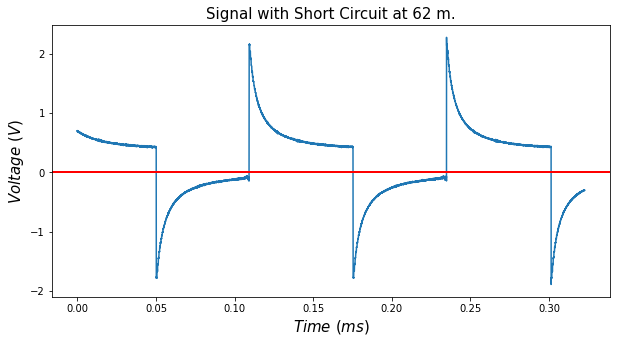

Sum of sampled values =  1774.7340000000002


In [48]:
#generate file paths
short_62_files_dir = './data/short-circuit/62m'
short_62_paths = ut.path_generator(short_62_files_dir)

#load a random file
v_short_62 = ut.file_loader(short_62_paths)


#plot the loaded signal
ut.single_plot(v_short_62, t, 'Signal with Short Circuit at 62 m.')

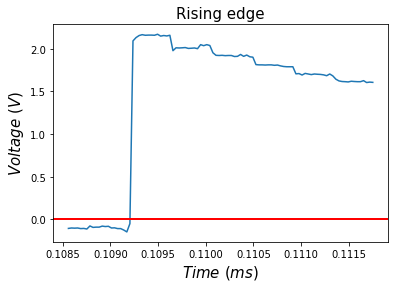

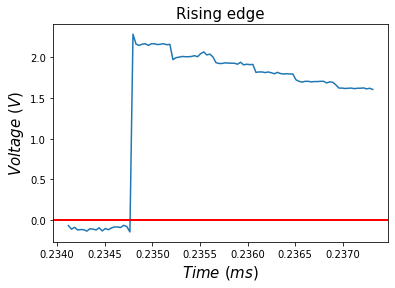

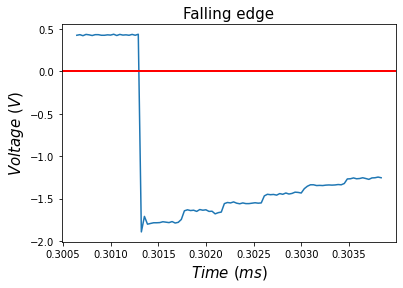

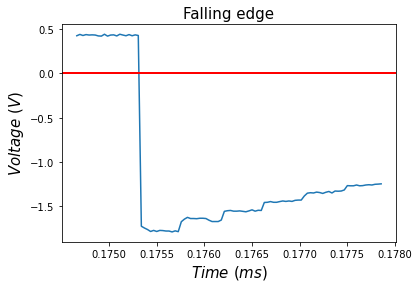

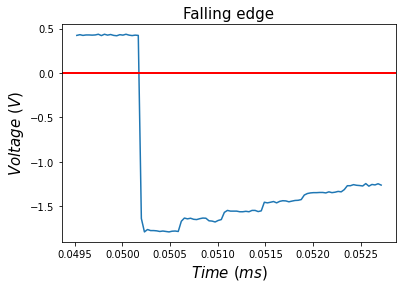

In [49]:
#locate rising and fallinge edges in the signal

short_62_edges_indices = ut.edges_detection(v_short_62, t, 3)
short_62_edges_indices


#plot rising an falling edges
ut.edges_plots(v_short_62, t, short_62_edges_indices, 80, 20)

In [50]:
#print sum of signals' sampled values
sums = ut.signal_sum(short_62_paths)

print(sums)

{'./data/short-circuit/62m/short-110-62-1.csv': 1397.5119999999995, './data/short-circuit/62m/short-110-62-10.csv': 1862.185, './data/short-circuit/62m/short-110-62-11.csv': 2247.88, './data/short-circuit/62m/short-110-62-12.csv': 2715.26, './data/short-circuit/62m/short-110-62-13.csv': 2676.008, './data/short-circuit/62m/short-110-62-14.csv': 1738.257, './data/short-circuit/62m/short-110-62-15.csv': 2055.4799999999996, './data/short-circuit/62m/short-110-62-16.csv': 2279.785, './data/short-circuit/62m/short-110-62-17.csv': 1795.7060000000001, './data/short-circuit/62m/short-110-62-18.csv': 1774.7340000000002, './data/short-circuit/62m/short-110-62-19.csv': 1612.1000000000004, './data/short-circuit/62m/short-110-62-2.csv': 2760.862, './data/short-circuit/62m/short-110-62-20.csv': 2546.685, './data/short-circuit/62m/short-110-62-21.csv': 1227.44, './data/short-circuit/62m/short-110-62-22.csv': 1339.159, './data/short-circuit/62m/short-110-62-3.csv': 2602.222, './data/short-circuit/62m/s

### 67 m
Short circuit at 67 m from the input port

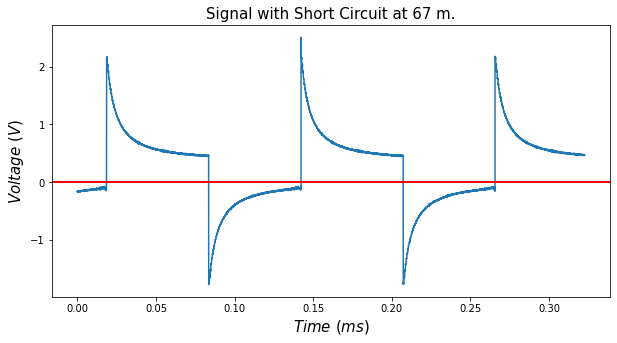

Sum of sampled values =  2729.174


In [51]:
#generate file paths
short_67_files_dir = './data/short-circuit/67m'
short_67_paths = ut.path_generator(short_67_files_dir)

#load a random file
v_short_67 = ut.file_loader(short_67_paths)


#plot the loaded signal
ut.single_plot(v_short_67, t, 'Signal with Short Circuit at 67 m.')

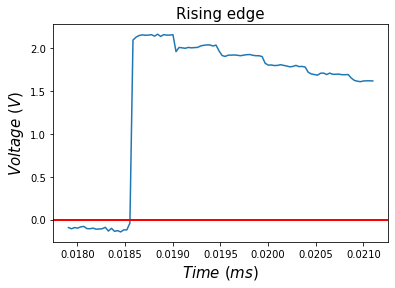

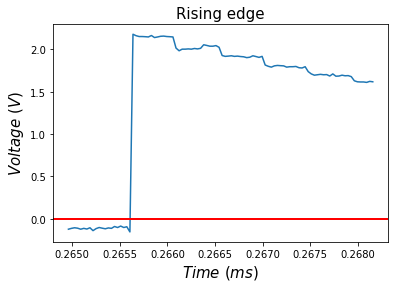

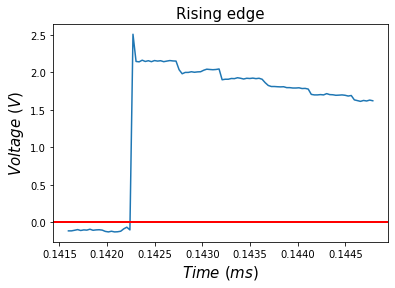

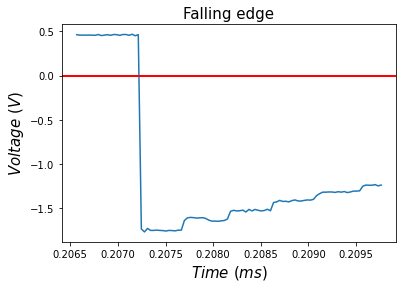

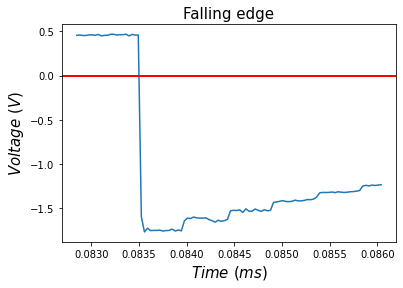

In [52]:
#locate rising and fallinge edges in the signal

short_67_edges_indices = ut.edges_detection(v_short_67, t, 3)
short_67_edges_indices


#plot rising an falling edges
ut.edges_plots(v_short_67, t, short_67_edges_indices, 80, 20)

In [53]:
#print sum of signals' sampled values
sums = ut.signal_sum(short_67_paths)

print(sums)

{'./data/short-circuit/67m/short-110-67-1.csv': 1264.665, './data/short-circuit/67m/short-110-67-10.csv': 1147.1750000000004, './data/short-circuit/67m/short-110-67-11.csv': 2793.1330000000003, './data/short-circuit/67m/short-110-67-12.csv': 1398.63, './data/short-circuit/67m/short-110-67-13.csv': 2176.1929999999998, './data/short-circuit/67m/short-110-67-14.csv': 2187.553, './data/short-circuit/67m/short-110-67-15.csv': 2729.7, './data/short-circuit/67m/short-110-67-16.csv': 2543.9300000000003, './data/short-circuit/67m/short-110-67-17.csv': 1827.373, './data/short-circuit/67m/short-110-67-18.csv': 2558.7309999999998, './data/short-circuit/67m/short-110-67-19.csv': 2698.2870000000003, './data/short-circuit/67m/short-110-67-2.csv': 1725.498, './data/short-circuit/67m/short-110-67-20.csv': 1414.7499999999998, './data/short-circuit/67m/short-110-67-21.csv': 2593.735, './data/short-circuit/67m/short-110-67-3.csv': 2470.6269999999995, './data/short-circuit/67m/short-110-67-4.csv': 1145.132

### 72 m
Short circuit at 72 m from the input port

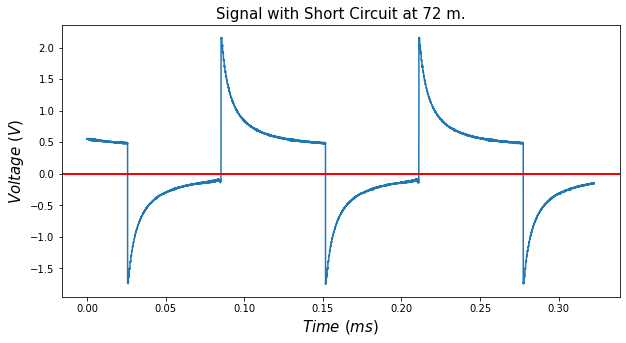

Sum of sampled values =  1393.245


In [54]:
#generate file paths
short_72_files_dir = './data/short-circuit/72m'
short_72_paths = ut.path_generator(short_72_files_dir)

#load a random file
v_short_72 = ut.file_loader(short_72_paths)


#plot the loaded signal
ut.single_plot(v_short_72, t, 'Signal with Short Circuit at 72 m.')

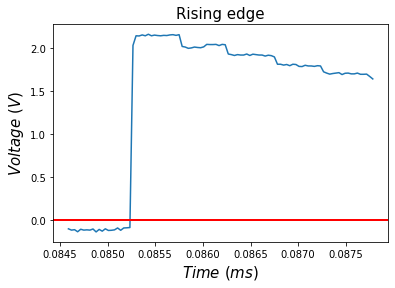

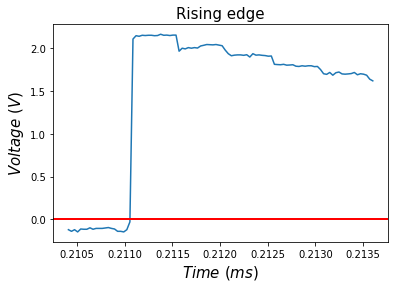

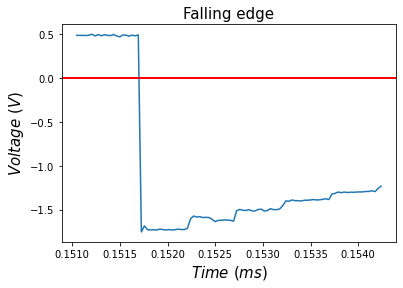

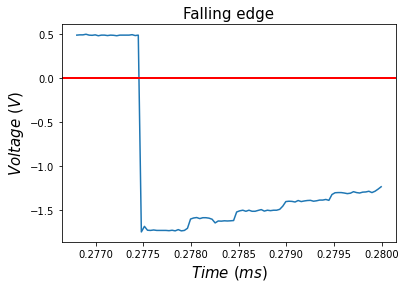

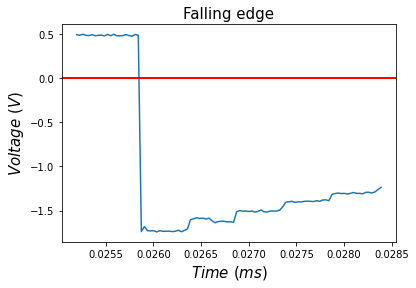

In [55]:
#locate rising and fallinge edges in the signal

short_72_edges_indices = ut.edges_detection(v_short_72, t, 3)
short_72_edges_indices


#plot rising an falling edges
ut.edges_plots(v_short_72, t, short_72_edges_indices, 80, 20)

In [56]:
#print sum of signals' sampled values
sums = ut.signal_sum(short_72_paths)

print(sums)

{'./data/short-circuit/72m/short-110-72-1.csv': 1396.878, './data/short-circuit/72m/short-110-72-10.csv': 2222.8709999999996, './data/short-circuit/72m/short-110-72-11.csv': 1457.6880000000003, './data/short-circuit/72m/short-110-72-12.csv': 2111.243, './data/short-circuit/72m/short-110-72-13.csv': -25146.728, './data/short-circuit/72m/short-110-72-14.csv': 2665.8219999999997, './data/short-circuit/72m/short-110-72-15.csv': 1621.18, './data/short-circuit/72m/short-110-72-16.csv': 2503.131, './data/short-circuit/72m/short-110-72-17.csv': 1245.0559999999998, './data/short-circuit/72m/short-110-72-18.csv': 2747.5460000000003, './data/short-circuit/72m/short-110-72-19.csv': 2946.6380000000004, './data/short-circuit/72m/short-110-72-2.csv': 1795.9100000000003, './data/short-circuit/72m/short-110-72-20.csv': 2910.291, './data/short-circuit/72m/short-110-72-3.csv': 1965.025, './data/short-circuit/72m/short-110-72-4.csv': 1535.9589999999998, './data/short-circuit/72m/short-110-72-5.csv': 3101.

### 77 m
Short circuit at 77 m from the input port

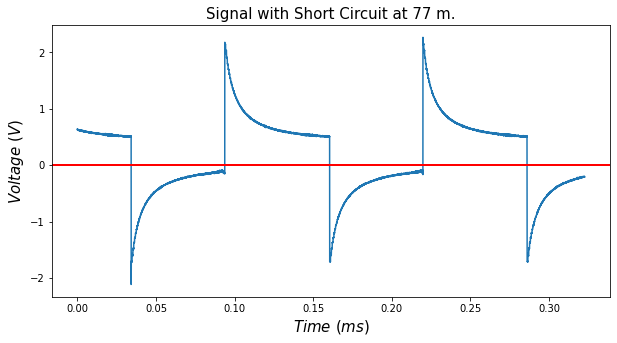

Sum of sampled values =  1675.6100000000001


In [57]:
#generate file paths
short_77_files_dir = './data/short-circuit/77m'
short_77_paths = ut.path_generator(short_77_files_dir)

#load a random file
v_short_77 = ut.file_loader(short_77_paths)


#plot the loaded signal
ut.single_plot(v_short_77, t, 'Signal with Short Circuit at 77 m.')

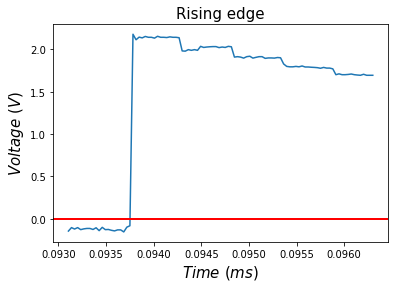

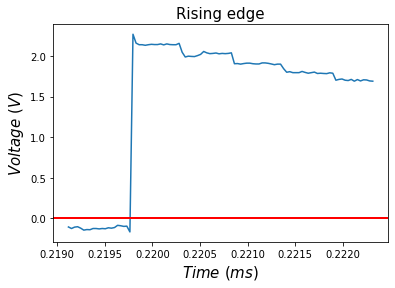

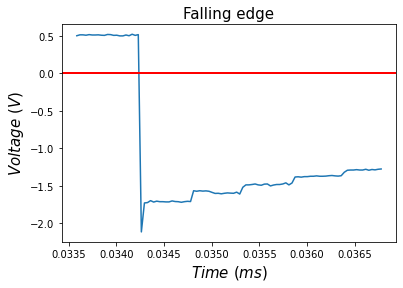

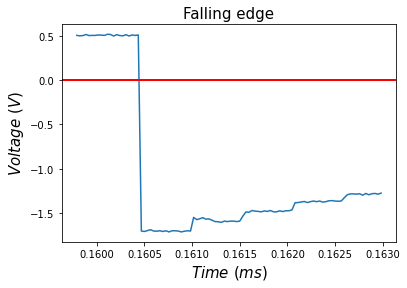

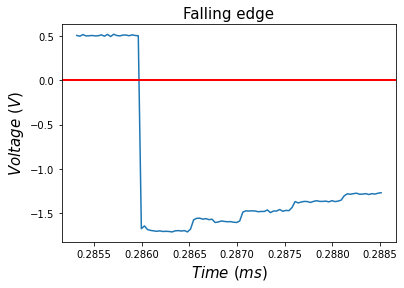

In [58]:
#locate rising and fallinge edges in the signal

short_77_edges_indices = ut.edges_detection(v_short_77, t, 3)
short_77_edges_indices


#plot rising an falling edges
ut.edges_plots(v_short_77, t, short_77_edges_indices, 80, 20)

In [59]:
#print sum of signals' sampled values
sums = ut.signal_sum(short_77_paths)

print(sums)

{'./data/short-circuit/77m/short-110-77-1.csv': 1233.548, './data/short-circuit/77m/short-110-77-10.csv': -25573.599000000006, './data/short-circuit/77m/short-110-77-11.csv': 1236.7210000000002, './data/short-circuit/77m/short-110-77-12.csv': 2579.9079999999994, './data/short-circuit/77m/short-110-77-13.csv': 1269.3860000000002, './data/short-circuit/77m/short-110-77-14.csv': 2907.145, './data/short-circuit/77m/short-110-77-15.csv': 2478.6810000000005, './data/short-circuit/77m/short-110-77-16.csv': 2092.141, './data/short-circuit/77m/short-110-77-17.csv': 1675.6100000000001, './data/short-circuit/77m/short-110-77-18.csv': -25295.217000000004, './data/short-circuit/77m/short-110-77-19.csv': 2904.58, './data/short-circuit/77m/short-110-77-2.csv': 1567.8280000000002, './data/short-circuit/77m/short-110-77-20.csv': 1420.136, './data/short-circuit/77m/short-110-77-21.csv': 2255.291, './data/short-circuit/77m/short-110-77-3.csv': 2429.8720000000003, './data/short-circuit/77m/short-110-77-4.

### 82 m
Short circuit at 82 m from the input port

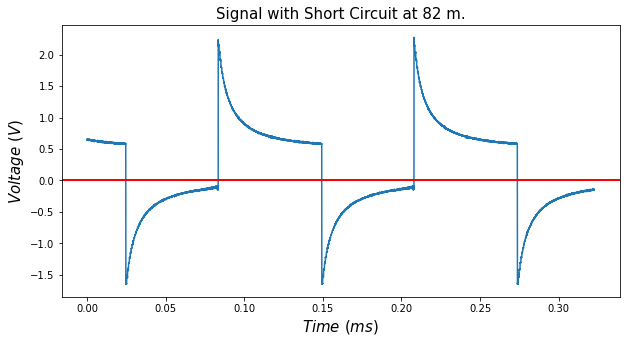

Sum of sampled values =  1792.1830000000004


In [60]:
#generate file paths
short_82_files_dir = './data/short-circuit/82m'
short_82_paths = ut.path_generator(short_82_files_dir)

#load a random file
v_short_82 = ut.file_loader(short_82_paths)


#plot the loaded signal
ut.single_plot(v_short_82, t, 'Signal with Short Circuit at 82 m.')

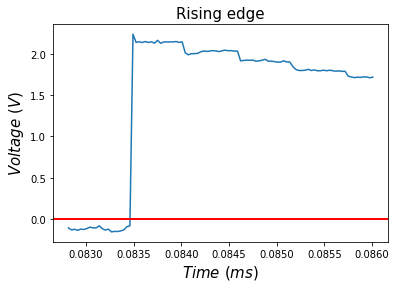

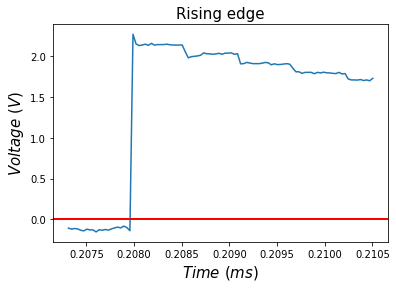

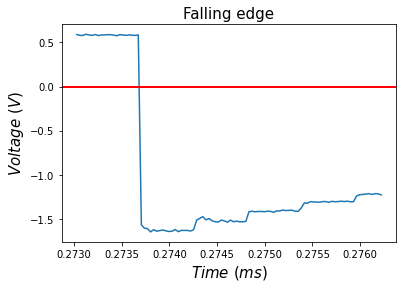

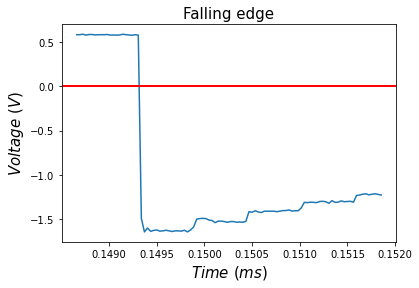

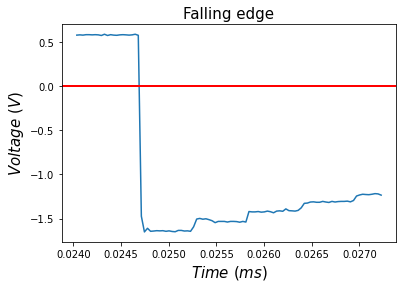

In [61]:
#locate rising and fallinge edges in the signal

short_82_edges_indices = ut.edges_detection(v_short_82, t, 3)
short_82_edges_indices


#plot rising an falling edges
ut.edges_plots(v_short_82, t, short_82_edges_indices, 80, 20)

In [62]:
#print sum of signals' sampled values
sums = ut.signal_sum(short_82_paths)

print(sums)

{'./data/short-circuit/82m/short-110-82-1.csv': 2668.5380000000005, './data/short-circuit/82m/short-110-82-10.csv': 1968.4140000000002, './data/short-circuit/82m/short-110-82-11.csv': 1597.811, './data/short-circuit/82m/short-110-82-12.csv': 3602.976, './data/short-circuit/82m/short-110-82-13.csv': 2415.625, './data/short-circuit/82m/short-110-82-14.csv': 2009.577, './data/short-circuit/82m/short-110-82-15.csv': 2387.8990000000003, './data/short-circuit/82m/short-110-82-16.csv': 2967.6589999999997, './data/short-circuit/82m/short-110-82-17.csv': 2625.1540000000005, './data/short-circuit/82m/short-110-82-18.csv': 1798.2189999999998, './data/short-circuit/82m/short-110-82-19.csv': 1792.1830000000004, './data/short-circuit/82m/short-110-82-2.csv': 1430.2309999999998, './data/short-circuit/82m/short-110-82-20.csv': 1828.0620000000001, './data/short-circuit/82m/short-110-82-21.csv': 1665.2369999999996, './data/short-circuit/82m/short-110-82-3.csv': 3021.8860000000004, './data/short-circuit/

### 87 m
Short circuit at 87 m from the input port

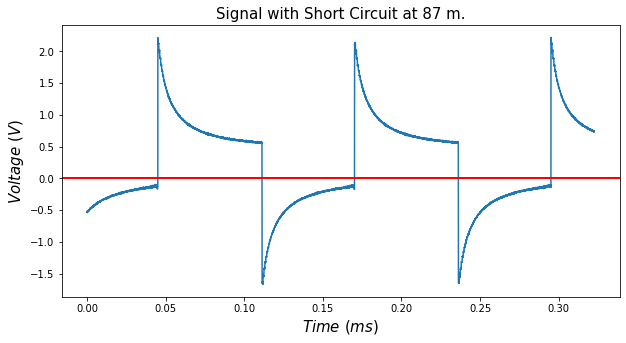

Sum of sampled values =  2468.426


In [63]:
#generate file paths
short_87_files_dir = './data/short-circuit/87m'
short_87_paths = ut.path_generator(short_87_files_dir)

#load a random file
v_short_87 = ut.file_loader(short_87_paths)


#plot the loaded signal
ut.single_plot(v_short_87, t, 'Signal with Short Circuit at 87 m.')


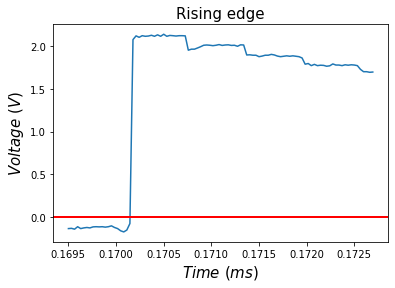

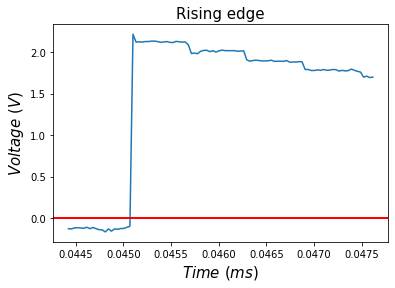

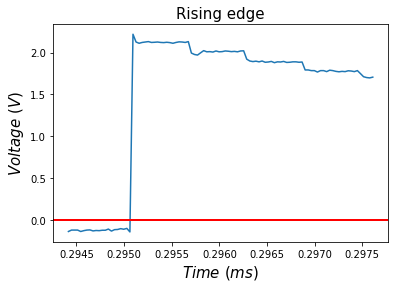

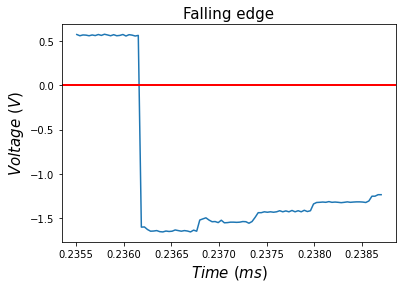

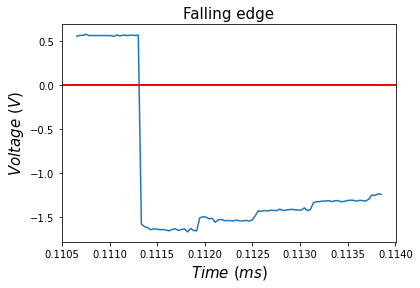

In [64]:
#locate rising and fallinge edges in the signal

short_87_edges_indices = ut.edges_detection(v_short_87, t, 3)
short_87_edges_indices


#plot rising an falling edges
ut.edges_plots(v_short_87, t, short_87_edges_indices, 80, 20)

In [65]:
#print sum of signals' sampled values
sums = ut.signal_sum(short_87_paths)

print(sums)

{'./data/short-circuit/87m/short-110-87-1.csv': 3365.0509999999995, './data/short-circuit/87m/short-110-87-10.csv': 3028.6010000000006, './data/short-circuit/87m/short-110-87-11.csv': 2468.426, './data/short-circuit/87m/short-110-87-12.csv': -25341.291000000005, './data/short-circuit/87m/short-110-87-13.csv': 2810.193, './data/short-circuit/87m/short-110-87-14.csv': 1843.9479999999999, './data/short-circuit/87m/short-110-87-15.csv': 2684.0579999999995, './data/short-circuit/87m/short-110-87-16.csv': 2332.583, './data/short-circuit/87m/short-110-87-17.csv': 2946.3, './data/short-circuit/87m/short-110-87-18.csv': 2113.3849999999998, './data/short-circuit/87m/short-110-87-19.csv': 3558.112, './data/short-circuit/87m/short-110-87-2.csv': 1433.5609999999995, './data/short-circuit/87m/short-110-87-20.csv': 2320.9709999999995, './data/short-circuit/87m/short-110-87-21.csv': 1735.1720000000005, './data/short-circuit/87m/short-110-87-3.csv': 3112.006, './data/short-circuit/87m/short-110-87-4.cs

### 92 m
Short circuit at 92 m from the input port

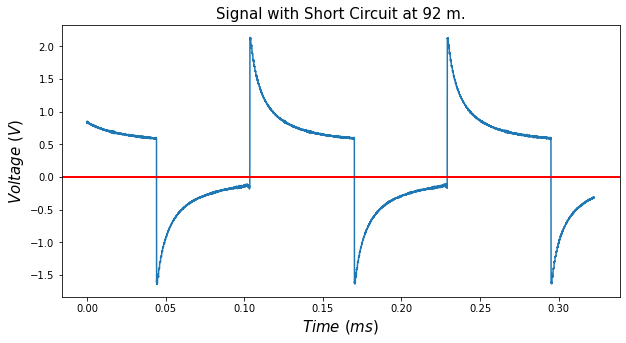

Sum of sampled values =  2336.9500000000003


In [66]:
#generate file paths
short_92_files_dir = './data/short-circuit/92m'
short_92_paths = ut.path_generator(short_92_files_dir)

#load a random file
v_short_92 = ut.file_loader(short_92_paths)


#plot the loaded signal
ut.single_plot(v_short_92, t, 'Signal with Short Circuit at 92 m.')

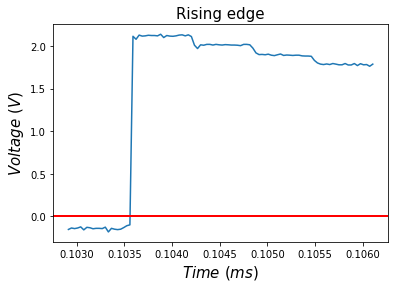

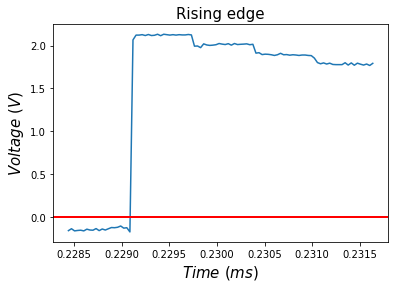

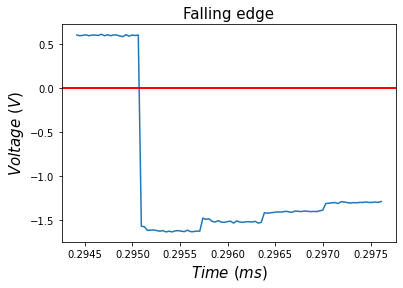

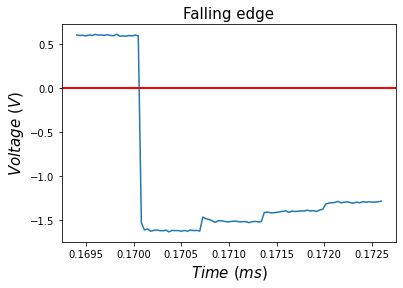

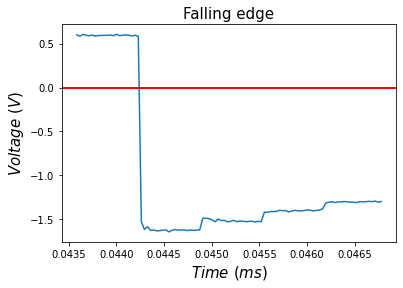

In [67]:
#locate rising and fallinge edges in the signal

short_92_edges_indices = ut.edges_detection(v_short_92, t, 3)

#plot rising an falling edges
ut.edges_plots(v_short_92, t, short_92_edges_indices, 80, 20)

In [68]:
#print sum of signals' sampled values
sums = ut.signal_sum(short_92_paths)

print(sums)

{'./data/short-circuit/92m/short-110-92-1.csv': 2217.369, './data/short-circuit/92m/short-110-92-10.csv': 2969.0359999999996, './data/short-circuit/92m/short-110-92-11.csv': 3424.0730000000003, './data/short-circuit/92m/short-110-92-12.csv': 1714.8709999999996, './data/short-circuit/92m/short-110-92-13.csv': 2687.0150000000003, './data/short-circuit/92m/short-110-92-14.csv': 2315.371, './data/short-circuit/92m/short-110-92-15.csv': 1738.245, './data/short-circuit/92m/short-110-92-16.csv': 3568.5689999999995, './data/short-circuit/92m/short-110-92-17.csv': 2584.7560000000003, './data/short-circuit/92m/short-110-92-18.csv': 3668.4049999999997, './data/short-circuit/92m/short-110-92-19.csv': 1732.3669999999995, './data/short-circuit/92m/short-110-92-2.csv': 2121.4900000000002, './data/short-circuit/92m/short-110-92-20.csv': 1776.1109999999999, './data/short-circuit/92m/short-110-92-21.csv': 3253.685, './data/short-circuit/92m/short-110-92-3.csv': 1618.1240000000003, './data/short-circuit/

### 97 m
Short circuit at 97 m from the input port

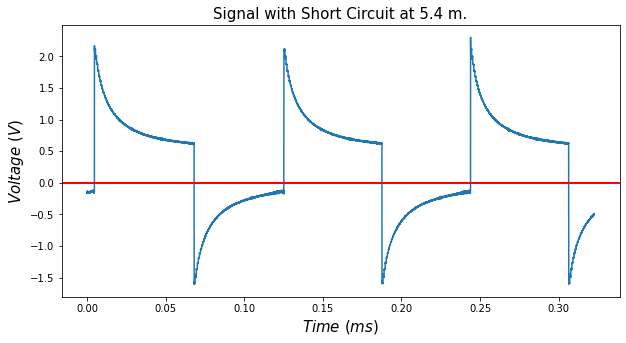

Sum of sampled values =  3251.289


In [69]:
#generate file paths
short_97_files_dir = './data/short-circuit/97m'
short_97_paths = ut.path_generator(short_97_files_dir)

#load a random file
v_short_97 = ut.file_loader(short_97_paths)


#plot the loaded signal
ut.single_plot(v_short_97, t, 'Signal with Short Circuit at 5.4 m.')

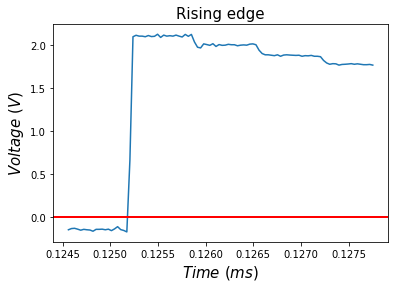

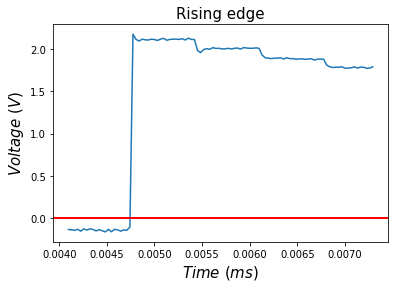

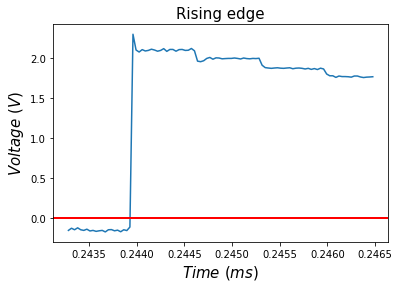

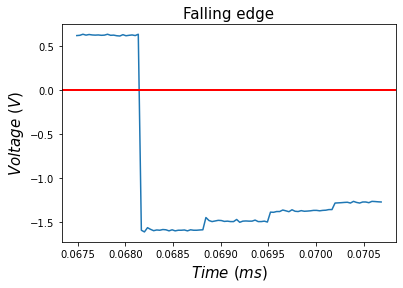

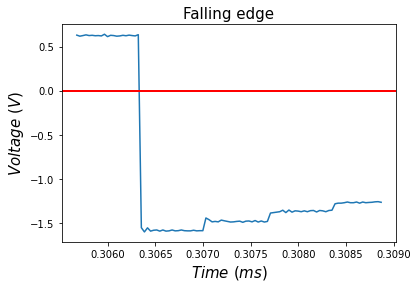

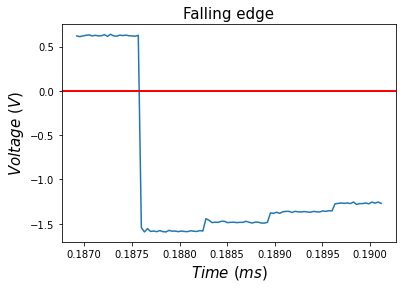

In [70]:
#locate rising and fallinge edges in the signal

short_97_edges_indices = ut.edges_detection(v_short_97, t, 3)
short_97_edges_indices


#plot rising an falling edges
ut.edges_plots(v_short_97, t, short_97_edges_indices, 80, 20)

In [71]:
#print sum of signals' sampled values
sums = ut.signal_sum(short_97_paths)

print(sums)

{'./data/short-circuit/97m/short-110-97-1.csv': 3430.206, './data/short-circuit/97m/short-110-97-10.csv': 2578.8269999999998, './data/short-circuit/97m/short-110-97-11.csv': 2900.723, './data/short-circuit/97m/short-110-97-12.csv': -25041.092, './data/short-circuit/97m/short-110-97-13.csv': 3265.182, './data/short-circuit/97m/short-110-97-14.csv': 3251.289, './data/short-circuit/97m/short-110-97-15.csv': 2478.538, './data/short-circuit/97m/short-110-97-16.csv': 1945.1739999999998, './data/short-circuit/97m/short-110-97-17.csv': 3174.781, './data/short-circuit/97m/short-110-97-18.csv': 3385.8689999999997, './data/short-circuit/97m/short-110-97-19.csv': 1840.6219999999998, './data/short-circuit/97m/short-110-97-2.csv': 3202.622, './data/short-circuit/97m/short-110-97-20.csv': 3428.723, './data/short-circuit/97m/short-110-97-21.csv': 2145.571, './data/short-circuit/97m/short-110-97-3.csv': 2158.749, './data/short-circuit/97m/short-110-97-4.csv': 2360.94, './data/short-circuit/97m/short-11

### 102 m
Short circuit at 102 m from the input port

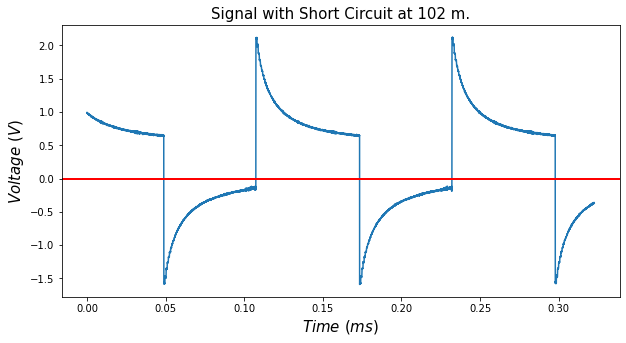

Sum of sampled values =  2732.213


In [72]:
#generate file paths
short_102_files_dir = './data/short-circuit/102m'
short_102_paths = ut.path_generator(short_102_files_dir)

#load a random file
v_short_102 = ut.file_loader(short_102_paths)


#plot the loaded signal
ut.single_plot(v_short_102, t, 'Signal with Short Circuit at 102 m.')

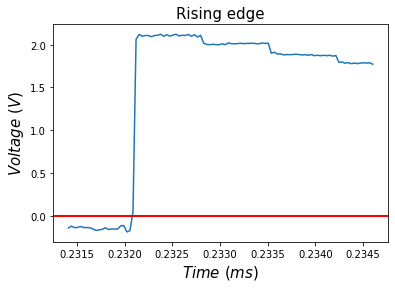

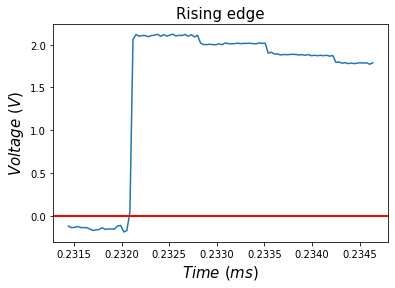

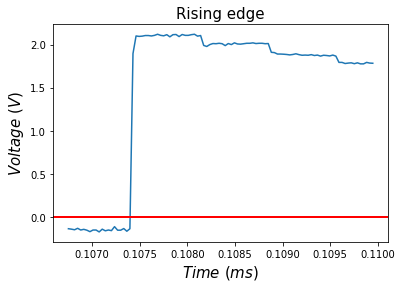

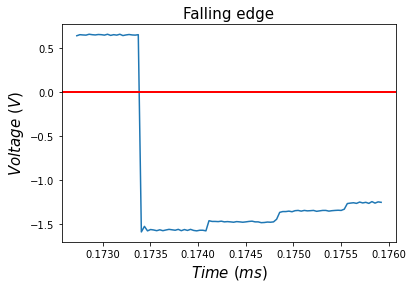

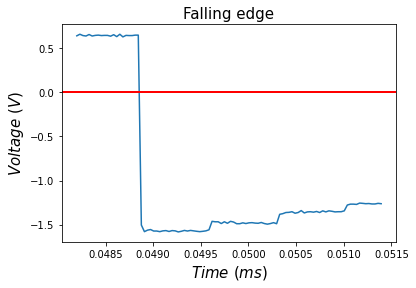

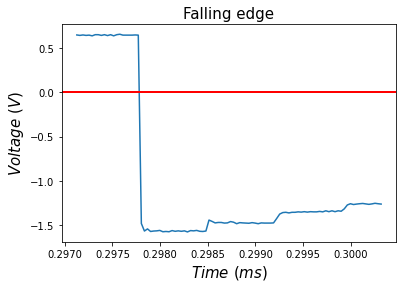

In [73]:
#locate rising and fallinge edges in the signal

short_102_edges_indices = ut.edges_detection(v_short_102, t, 3)
short_102_edges_indices


#plot rising an falling edges
ut.edges_plots(v_short_102, t, short_102_edges_indices, 80, 20)

In [74]:
#print sum of signals' sampled values
sums = ut.signal_sum(short_102_paths)

print(sums)

{'./data/short-circuit/102m/short-110-102-1.csv': 2954.387, './data/short-circuit/102m/short-110-102-10.csv': 3276.0009999999997, './data/short-circuit/102m/short-110-102-11.csv': 1916.047, './data/short-circuit/102m/short-110-102-12.csv': -24948.920999999995, './data/short-circuit/102m/short-110-102-13.csv': 2894.1620000000003, './data/short-circuit/102m/short-110-102-14.csv': 3676.8499999999995, './data/short-circuit/102m/short-110-102-15.csv': 2732.213, './data/short-circuit/102m/short-110-102-16.csv': 2668.014, './data/short-circuit/102m/short-110-102-17.csv': 2099.2079999999996, './data/short-circuit/102m/short-110-102-18.csv': 3146.3059999999996, './data/short-circuit/102m/short-110-102-19.csv': 2016.645, './data/short-circuit/102m/short-110-102-2.csv': 3257.138, './data/short-circuit/102m/short-110-102-20.csv': 3516.337, './data/short-circuit/102m/short-110-102-21.csv': 3981.291, './data/short-circuit/102m/short-110-102-22.csv': 2490.431, './data/short-circuit/102m/short-110-102